# Problem Formulation

## Why We Choose This Dataset?

The **Loan Prediction Dataset** is selected as it tackles a genuine challenge encountered by financial organizations: determining whether to accept or deny a loan application. This choice is essential since it has a direct effect on the bank's earnings and the satisfaction of its customers. Granting loans to applicants who are likely to default can result in financial setbacks, whereas turning away creditworthy applicants may lead to lost opportunities and disappointment.

The dataset includes a variety of features like the applicant's income, education, marital status, credit history, and additional factors, making it an ideal option for examining the intricacies of decision-making in loan approvals.

[Dataset Source](https://www.kaggle.com/datasets/omkar5/dataset-for-bank-loan-prediction)

---

## Problem Statement

The process of obtaining loan approval poses significant challenges for banks and financial institutions. Each application carries a certain level of unpredictability concerning the applicant's capacity to repay the loan. Unfavorable outcomes may lead to:

1. **Financial Risks**: Granting loans to applicants with high risk can result in defaults and financial losses.
2. **Customer Dissatisfaction**: Turning away qualified candidates harms the institution's standing and erodes customer confidence.
3. **Operational Inefficiency**: The process of manually assessing applications takes a lot of time and lacks consistency.

As loan applications rise and the demand for equitable and effective decision-making grows, financial institutions need a dependable solution to streamline and enhance the process.

---

## Why Is Loan Prediction a Problem?

1. **Financial Risk for Banks**:
   - Granting loans to individuals who lack the capacity to repay can lead to **defaults**, causing considerable financial setbacks for banks. On the other hand, turning away qualified applicants results in banks missing out on potential income and damaging their relationships with customers. Finding the perfect equilibrium is a difficult task.

2. **Diverse Applicant Profiles**:
   -  Candidates originate from a range of backgrounds, showcasing different income levels, credit histories, employment statuses, and financial habits. Assessing these factors in a comprehensive and consistent manner is challenging for manual methods and may result in mistakes or biases.

3. **Manual Decision-Making Is Inefficient**:
   -  Numerous banks continue to depend on manual or partially automated methods for approving loans. This creates the framework:
        - **Time-Consuming**: Manually reviewing applications takes a considerable amount of time, resulting in processing delays.
        - **Inconsistent**: Assessments made by individuals can differ based on the officer's background, perspective, or personal biases.

4. **Lack of Transparency and Fairness**:
   - Choices made using personal judgment or manual evaluation frequently lack clarity. Applicants might find it confusing when their loans are denied, which can result in feelings of dissatisfaction and mistrust.

5. **Increasing Volume of Applications**:
   - With the expansion of financial services, there is a swift rise in the volume of loan applications. The sheer volume of applications makes manual processing unfeasible, particularly in a competitive landscape where quickness and effectiveness are crucial.

6. **Regulatory and Compliance Pressure**:
   - Banks are required to make certain that their loan approval processes comply with regulations, including fair lending practices, anti-discrimination laws, and data security protocols. Unfair or uneven decisions may result in legal actions or fines from regulatory bodies.

---

## Goal

This project aims to create a machine learning model that utilizes data to determine the approval or rejection of loan applications, so that there will be less people who default their loan.

The benefits also include:

1. **Reduce Financial Risk**: Recognize high-risk applicants to decrease the likelihood of loan defaults.
2. **Ensure Fairness**: Assess candidates using objective data instead of personal opinions, guaranteeing equitable treatment.
3. **Improve Efficiency**: Streamline the decision-making process to manage a high volume of applications efficiently.

**Brief Intro**

The model will utilize factors like income, loan amount, credit history, and employment type to determine the likelihood of loan approval. This approach seeks to:
- Enhance the efficiency of the loan approval process.
-  Empower banks to make knowledgeable, evidence-based choices.
- Improve customer satisfaction by minimizing processing times and promoting equity.

# Data Preparation

The dataset contains information such as Credit Score, Annual Income, Loan Amount, Home Ownership, and Loan Status (the target variable). However, before using it for prediction, we need to clean it.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Configure Seaborn for better visualizations
sns.set(style="whitegrid", palette="coolwarm")

In [ ]:
# Load datasets
train_df = pd.read_csv("credit_train.csv")

In [ ]:
print("Train Data Overview:")
train_df.tail()

Train Data Overview:


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop completely empty rows
train_df = train_df.dropna(how="all")

# Check as there should be only 100,000 rows (row 0 to 99,999)
train_df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
print("\nTrain Data Info:")
train_df.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46

In [ ]:
train_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
print("\nUnique Value Counts:")
train_df.nunique()


Unique Value Counts:


,0
Loan ID,81999
Customer ID,81999
Loan Status,2
Current Loan Amount,22004
Term,2
Credit Score,324
Annual Income,36174
Years in current job,11
Home Ownership,4
Purpose,16


In [ ]:
print("\nLoan Status Distribution:")
train_df['Loan Status'].value_counts()


Loan Status Distribution:


,count
Loan Status,
Fully Paid,77361
Charged Off,22639


In [ ]:
missing_values = train_df.isnull().sum()
print(missing_values)

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64


**Key Findings**

The dataset contains loan-related features such as Credit Score, Annual Income, and Loan Status. Some values are missing which will be addressed below.

The target variable (Loan Status) is categorical and needs encoding, which will be done in subsequent sections



# Exploratory Data Analysis

#**Initial EDA (before data cleaning):**

1. Helps understand the dataset's structure, distributions, and potential issues.
2. Identifies missing values, outliers, inconsistencies, and patterns.
3. Guides the data cleaning process

**Identifying Missing Values**

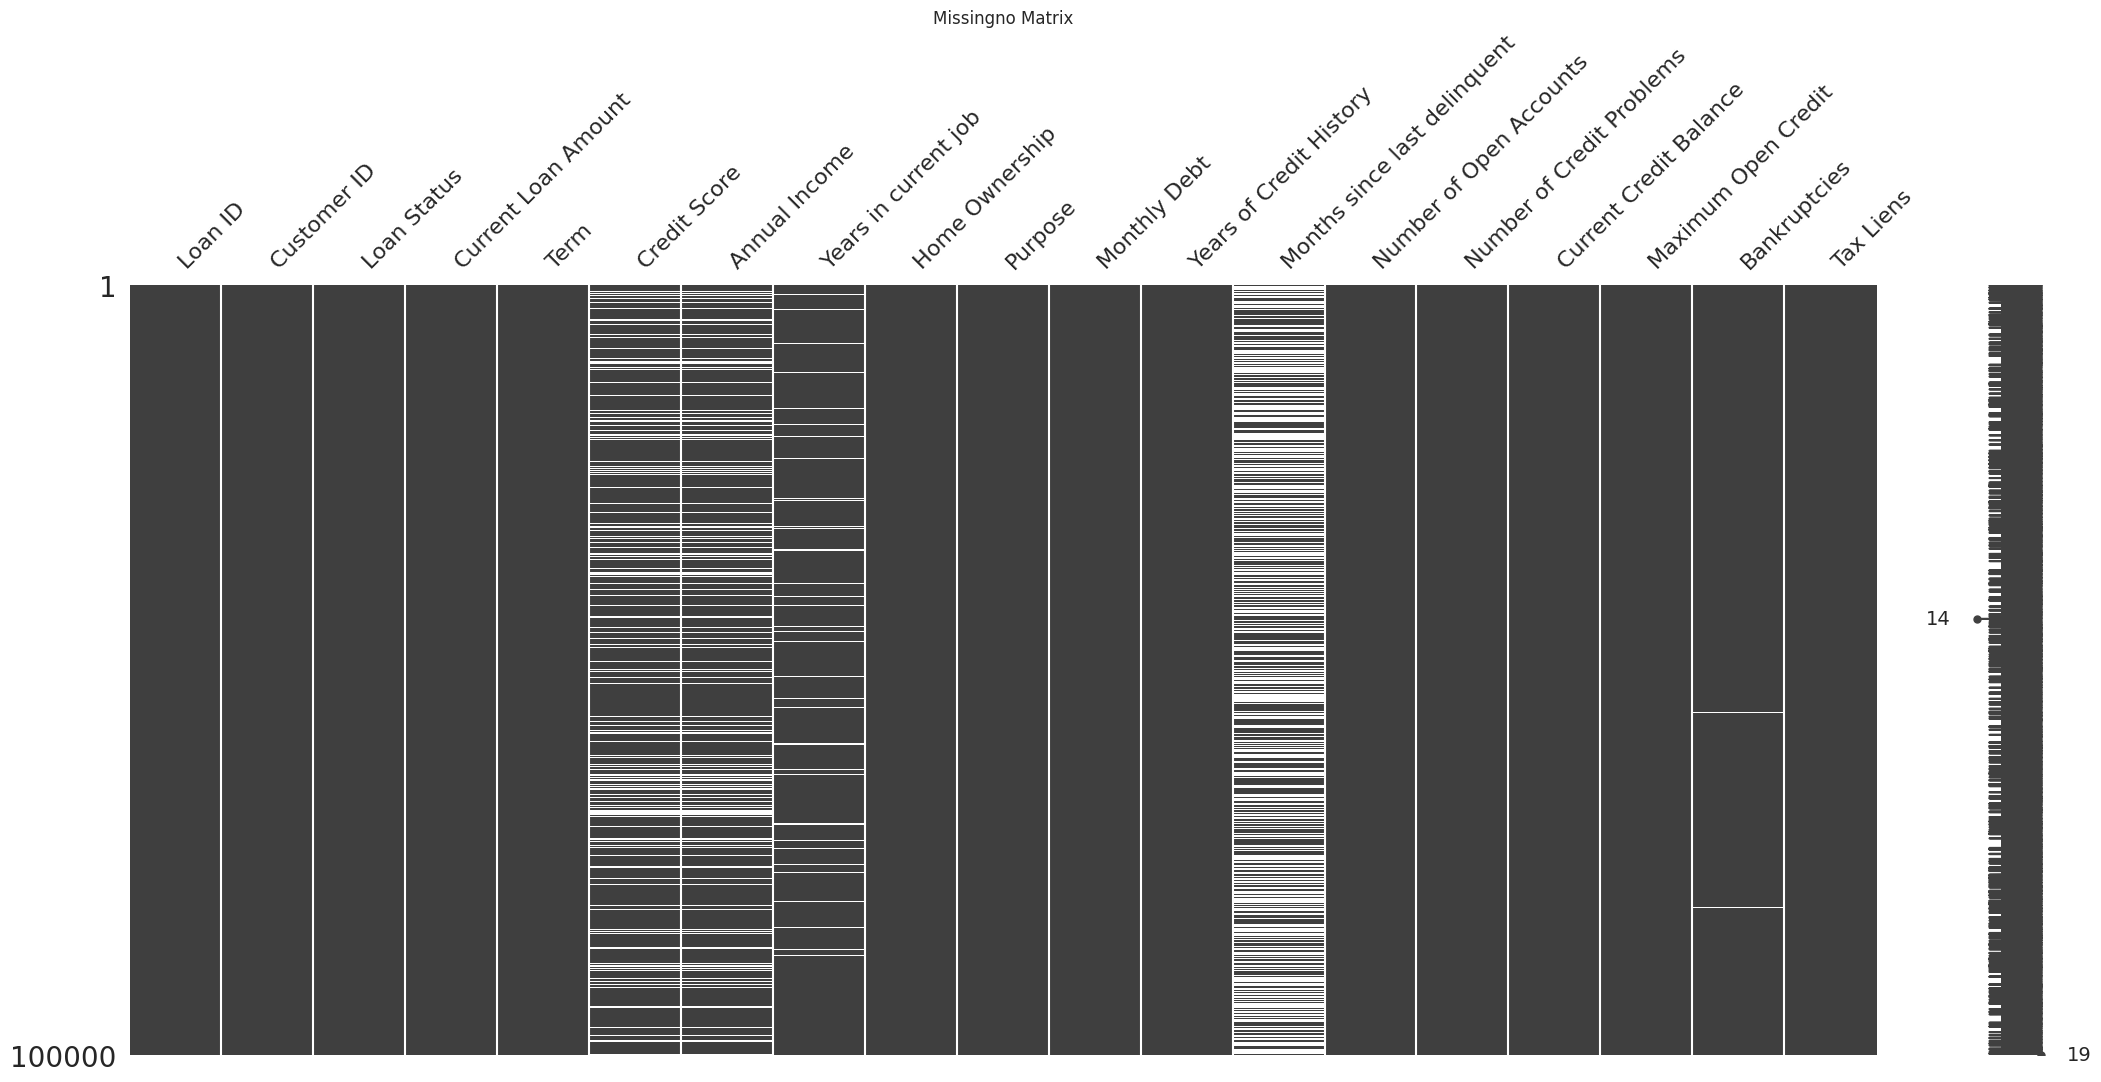

Missing Values (%):
Credit Score                    19.154
Annual Income                   19.154
Years in current job             4.222
Months since last delinquent    53.141
Maximum Open Credit              0.002
Bankruptcies                     0.204
Tax Liens                        0.010
dtype: float64


In [ ]:
# Visualizing missing values
msno.matrix(train_df)
plt.title("Missingno Matrix")
plt.show()

# Checking percentage of missing values
missing_values = train_df.isnull().sum() / len(train_df) * 100
print("Missing Values (%):")
print(missing_values[missing_values > 0])

Credit Score & Annual Income have ~19% missing values.</br>
Months Since Last Delinquent has over 50% missing values (too much to reliably impute).</br>
The rest have minor missing values.

**Understanding the Target Variable**

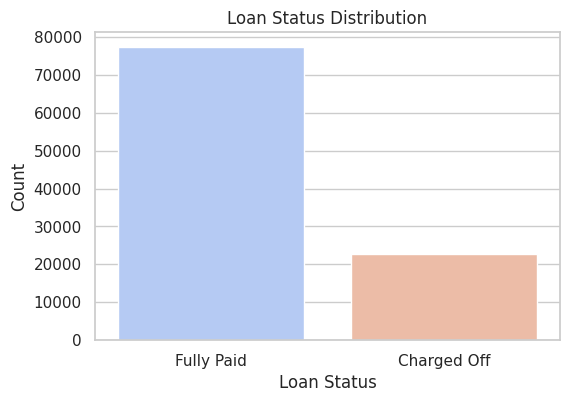

In [ ]:
# Loan Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["Loan Status"], hue=train_df["Loan Status"], palette="coolwarm", legend=False)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Loan Status Distribution")
plt.show()

The dataset is imbalanced—most loans are Fully Paid, fewer are Charged Off.
1. Fully paid --> the loan is fully paid
2. Charged off --> the loan is defaulted

**Understanding the Numerical Variable**

Exploring all numerical features distribution

<ipython-input-12-3e246cbd07e5>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')


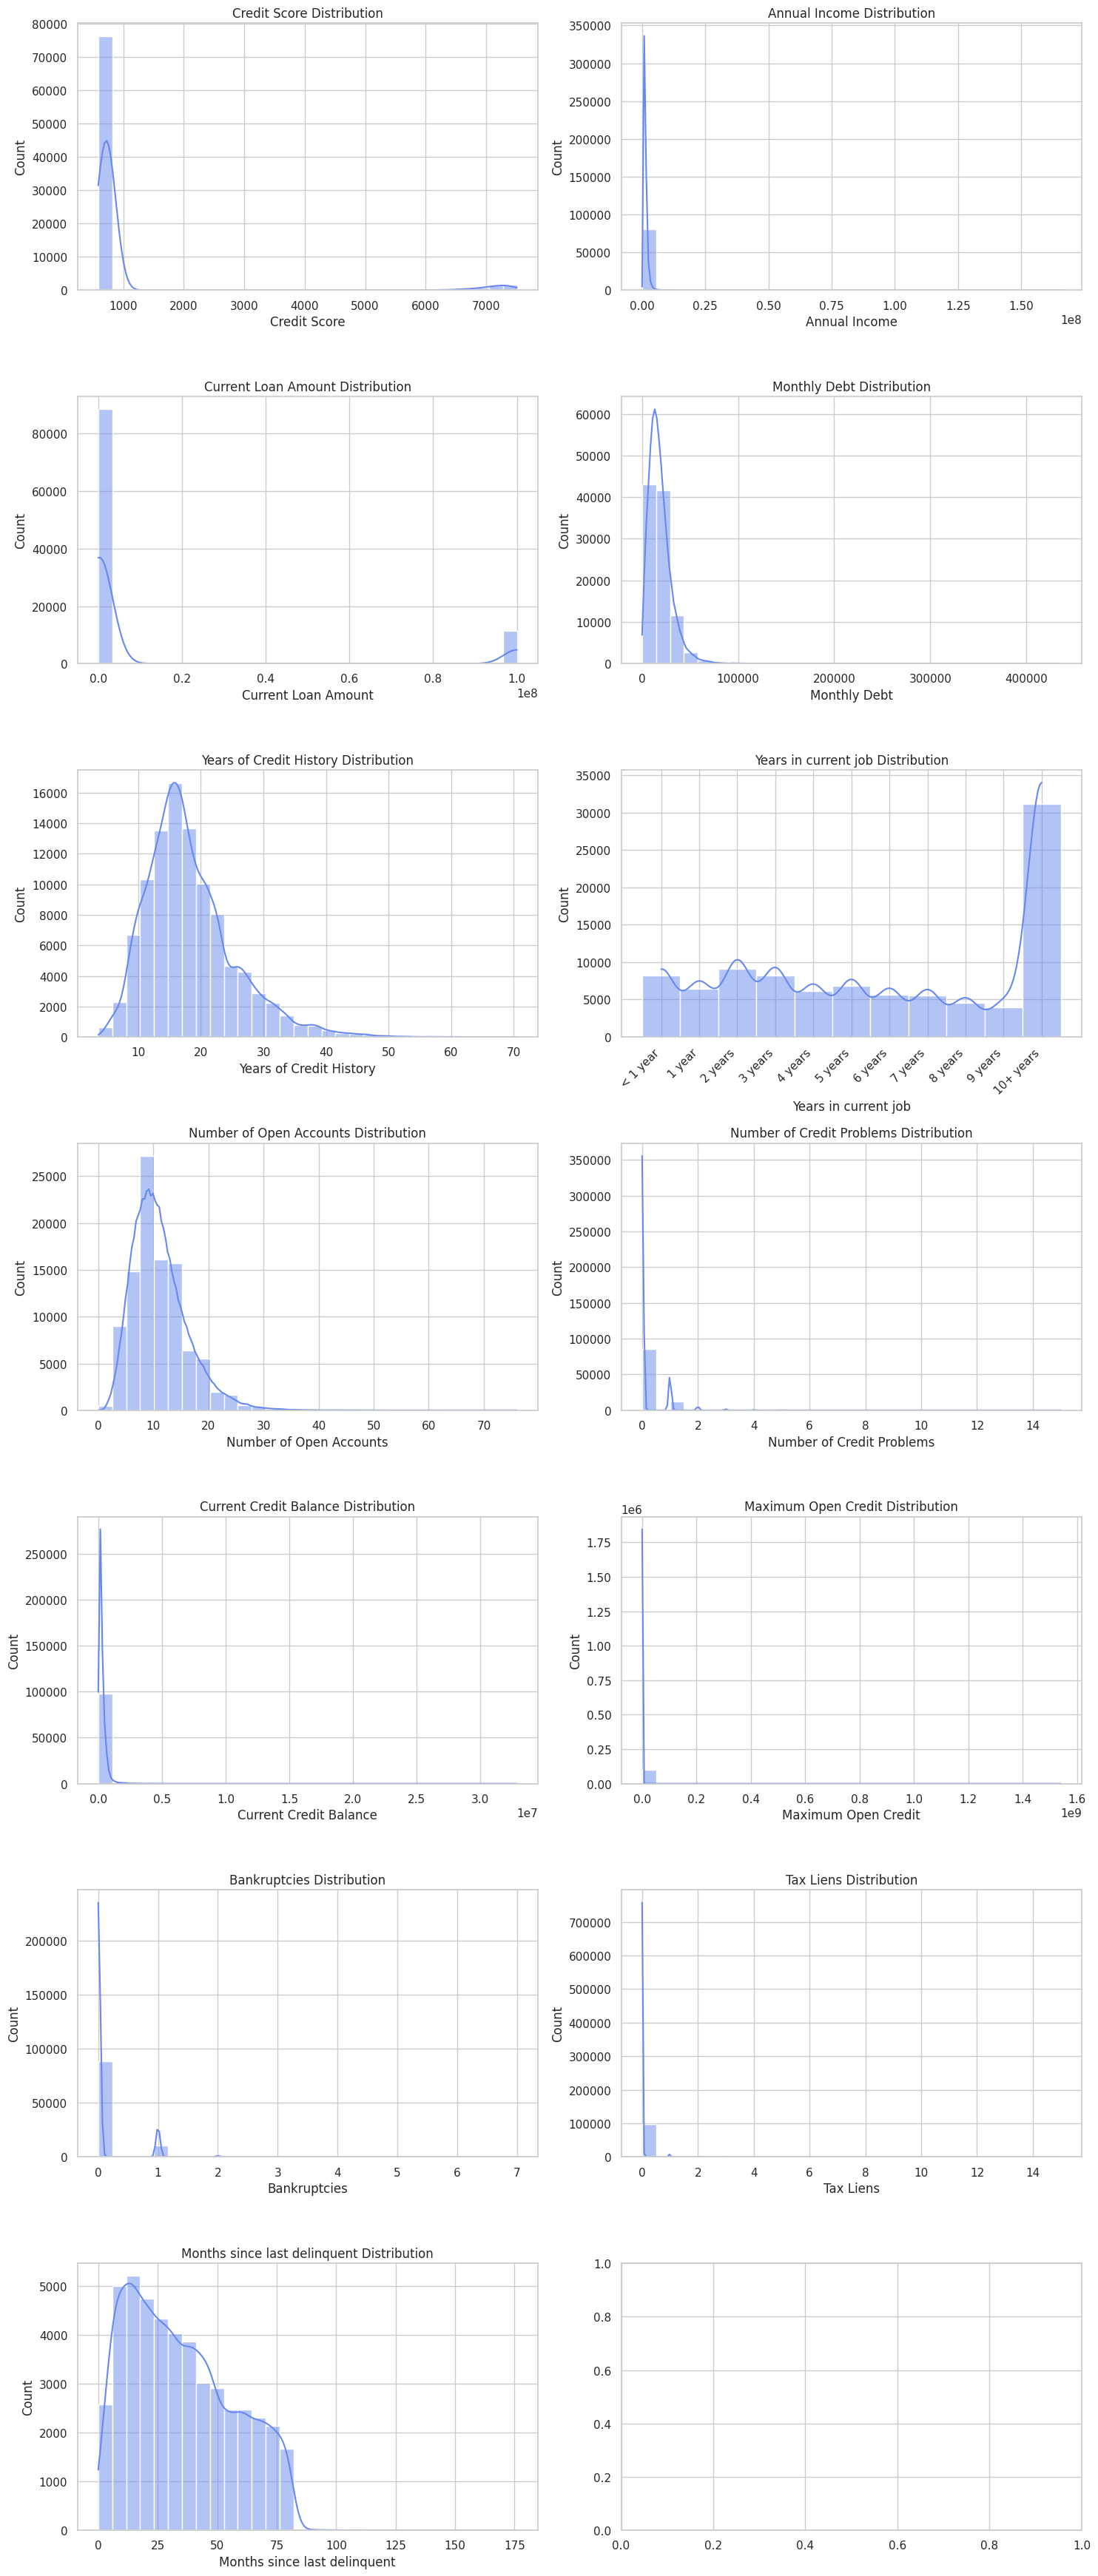

In [ ]:
job_year_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years',
                  '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

#Convert column to ordered categorical
train_df['Years in current job'] = pd.Categorical(
    train_df['Years in current job'],
    categories=job_year_order,
    ordered=True
)

# Histograms numerical features 2 per row
numerical_features = ['Credit Score', 'Annual Income', 'Current Loan Amount', 'Monthly Debt',
                      'Years of Credit History', 'Years in current job', 'Number of Open Accounts',
                      'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit',
                      'Bankruptcies', 'Tax Liens', 'Months since last delinquent']

num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.histplot(train_df[feature].dropna(), bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"{feature} Distribution")
    if feature == 'Years in current job':
        axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Choosing key numerical values and eveluating how it varies against Loan Status (Target variable):**

Our selection focused on the most impactful and readily interpretable features for loan risk assessment.

We decided that these numerical variables are fundamental for loan prediction as they directly reflect a borrower's financial capacity and risk profile.
- **Credit Score** and **Annual Income** assess creditworthiness and repayment ability.
-**Current Loan Amount** and **Monthly Debt** indicate the financial burden and existing commitments.
-**Years of Credit History** showcases credit management experience.
-**Bankruptcies** signifies financial history and likelyhood of future financial distress.
---
**Features left out (not data cleaning):**

Features like '**Months Since Last Delinquent**' had excessive missing data, hindering reliable imputation.

While variables, such as '**Number of Open Accounts**' etc, could introduce unnecessary computation without significantly improving prediction.

---

**FINDINGS:**
**We discovered outliers in current loan amount and credit score distribution.**

In [ ]:
total_rows = len(train_df)

# Count rows where "Current Loan Amount" is 99999999
placeholder_count = (train_df["Current Loan Amount"] == 99999999).sum()

percentage_placeholder = (placeholder_count / total_rows) * 100

print(f" Percentage of Data with Current Loan Amount = 99999999: {percentage_placeholder:.2f}%")

 Percentage of Data with Current Loan Amount = 99999999: 11.48%


While doing EDA, we saw that there is a considerable amount of anomalies in the distribution of current loan amount on the right side. Upon understanding the data, we discovered that there is 11.48% of data which has the value of 99999999 as their current loan amount. This could be because that value is a placeholder.

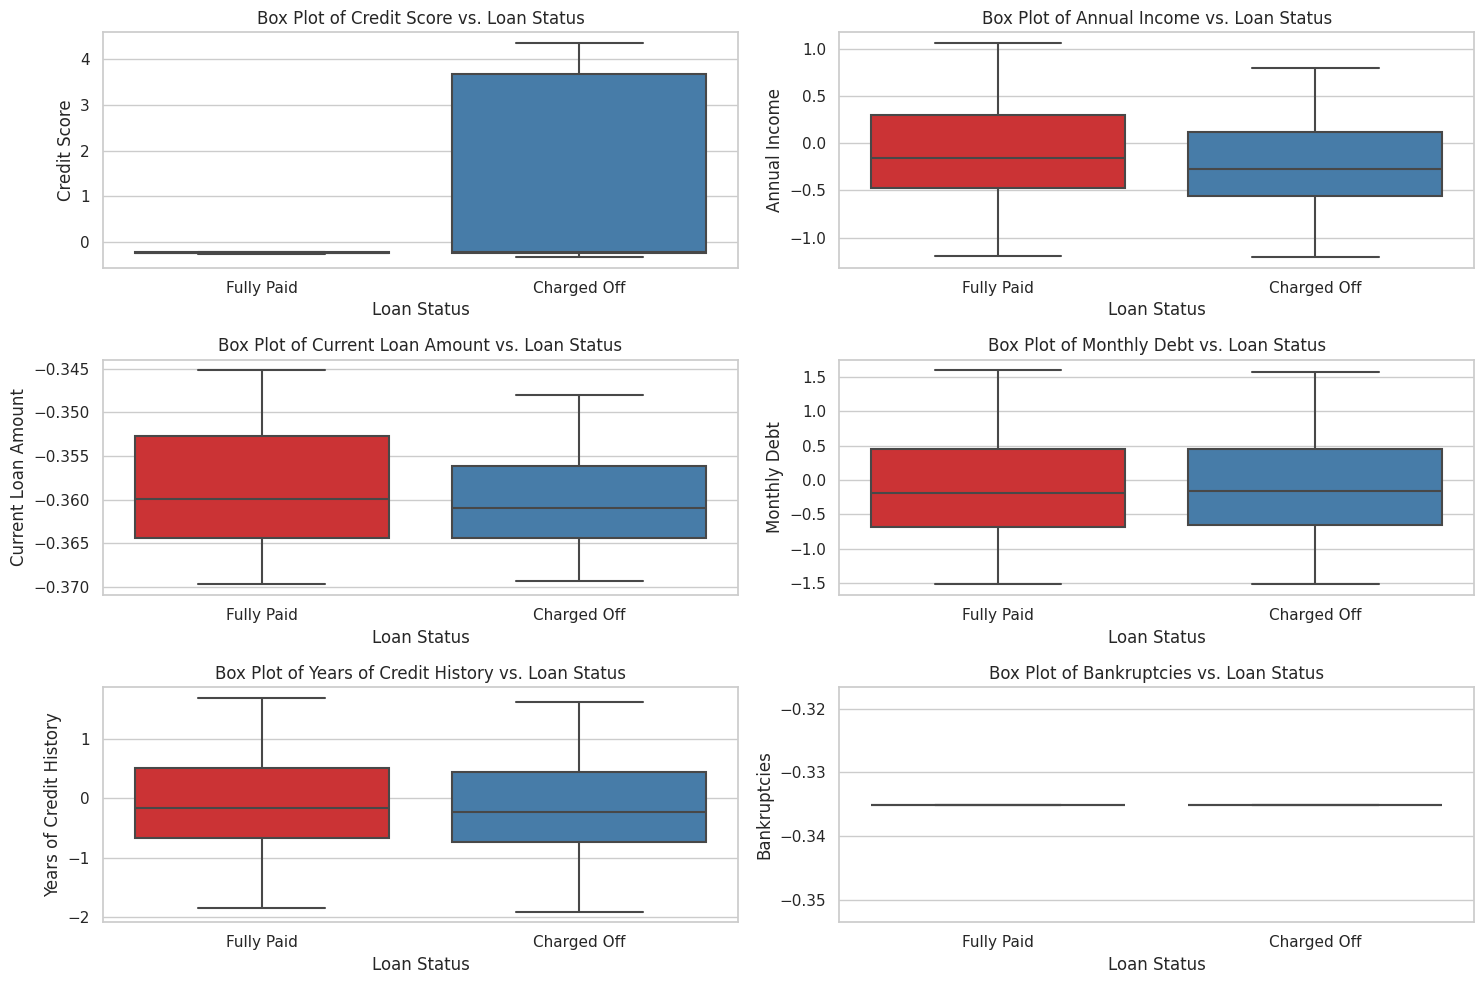

In [ ]:
from sklearn.preprocessing import StandardScaler

selected_features = ['Credit Score', 'Annual Income', 'Current Loan Amount', 'Monthly Debt', 'Years of Credit History', 'Bankruptcies', 'Loan Status']
plot_data = train_df[selected_features].copy()

numerical_cols = ['Credit Score', 'Annual Income', 'Current Loan Amount', 'Monthly Debt', 'Years of Credit History', 'Bankruptcies']
scaler = StandardScaler() # to have mean 0
plot_data[numerical_cols] = scaler.fit_transform(plot_data[numerical_cols])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(selected_features[:-1]):
    row = i // 2
    col = i % 2

    sns.boxplot(x='Loan Status', y=feature, data=plot_data, ax=axes[row, col], hue='Loan Status', palette='Set1', linewidth=1.5, whis=1.0, showfliers=False, legend=False)
    axes[row, col].set_title(f'Box Plot of {feature} vs. Loan Status')
    axes[row, col].set_xlabel('Loan Status')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
grouped_data = plot_data.groupby('Loan Status')

# Iterate through each feature and print the box plot statistics
for feature in ['Credit Score', 'Annual Income', 'Current Loan Amount', 'Monthly Debt', 'Years of Credit History', 'Bankruptcies']:
    print(f"\nBox Plot Statistics for {feature}:")
    for loan_status, data in grouped_data:
        stats = data[feature].describe()
        IQR = stats['75%'] - stats['25%']
        lower_whisker = stats['25%'] - 1.5 * IQR
        upper_whisker = stats['75%'] + 1.5 * IQR

        # Calculate outlier count
        outliers = data[(data[feature] < lower_whisker) | (data[feature] > upper_whisker)]
        outlier_count = len(outliers)

        print(f"  {loan_status}:")
        print(f"    Median: {stats['50%']:.2f}")
        print(f"    Q1: {stats['25%']:.2f}")
        print(f"    Q3: {stats['75%']:.2f}")
        print(f"    Lower Whisker: {lower_whisker:.2f}")
        print(f"    Upper Whisker: {upper_whisker:.2f}")
        print(f"    Outlier Count: {outlier_count}")


Box Plot Statistics for Credit Score:
  Charged Off:
    Median: -0.23
    Q1: -0.25
    Q3: 3.68
    Lower Whisker: -6.14
    Upper Whisker: 9.57
    Outlier Count: 0
  Fully Paid:
    Median: -0.24
    Q1: -0.25
    Q3: -0.23
    Lower Whisker: -0.29
    Upper Whisker: -0.19
    Outlier Count: 2084

Box Plot Statistics for Annual Income:
  Charged Off:
    Median: -0.27
    Q1: -0.55
    Q3: 0.12
    Lower Whisker: -1.57
    Upper Whisker: 1.13
    Outlier Count: 808
  Fully Paid:
    Median: -0.15
    Q1: -0.47
    Q3: 0.29
    Lower Whisker: -1.62
    Upper Whisker: 1.44
    Outlier Count: 2797

Box Plot Statistics for Current Loan Amount:
  Charged Off:
    Median: -0.36
    Q1: -0.36
    Q3: -0.36
    Lower Whisker: -0.38
    Upper Whisker: -0.34
    Outlier Count: 0
  Fully Paid:
    Median: -0.36
    Q1: -0.36
    Q3: -0.35
    Lower Whisker: -0.38
    Upper Whisker: -0.34
    Outlier Count: 11484

Box Plot Statistics for Monthly Debt:
  Charged Off:
    Median: -0.17
    Q1: 

**Interpreting the results**

Most of the variables have **similar spread** and **similar median** which do not show any clear relationship with the target variable.

However, **credit score** against target variable showed a clear relationship where borrowers with higher credit score seems to default on payment, which is surprising.

These counterintuitive results may also be due to the fact that the data has imbalances and because there are missing values of roughly 19% as shown beforehand.

**Trying to gain insights from bankruptcy values**

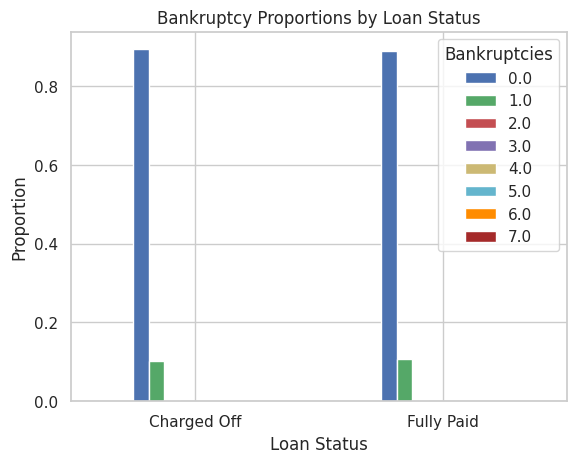

In [ ]:
# Group by 'Loan Status' and calculate proportions of bankruptcy values
bankruptcy_proportions = train_df.groupby('Loan Status')['Bankruptcies'].value_counts(normalize=True).unstack()

custom_palette = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#FF8C00', '#A52A2A']

# Plot the proportions
bankruptcy_proportions.plot(kind='bar', stacked=False, color=custom_palette)
plt.title('Bankruptcy Proportions by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Bankruptcies')
plt.show()

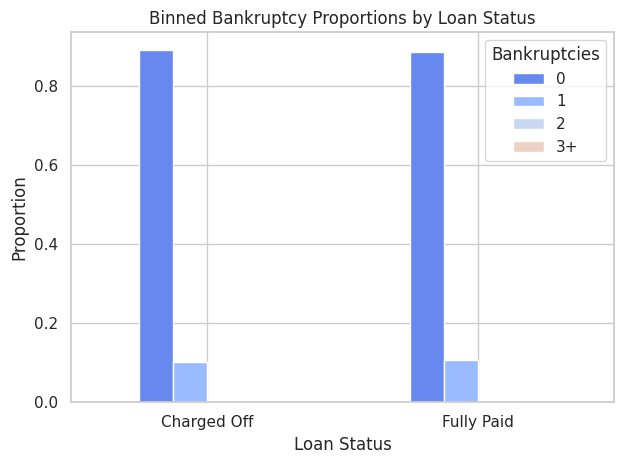

In [ ]:
# Create binned series
bankruptcy_binned = train_df['Bankruptcies'].apply(lambda x: str(int(x)) if x <= 2 else '3+')

# Create a temporary DataFrame just for plotting
temp_df = train_df.copy()
temp_df['Bankruptcy_Bin'] = bankruptcy_binned

bankruptcy_proportions_binned = (
    temp_df.groupby('Loan Status')['Bankruptcy_Bin']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

column_order = ['0', '1', '2', '3+']
bankruptcy_proportions_binned = bankruptcy_proportions_binned.reindex(columns=column_order, fill_value=0)

bankruptcy_proportions_binned.plot(kind='bar', stacked=False)
plt.title('Binned Bankruptcy Proportions by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Bankruptcies')
plt.tight_layout()
plt.show()


Based on these observations, the Bankruptcies feature might not be a strong predictor of loan status on its own. The proportions of bankruptcy values are relatively similar between the "Charged Off" and "Fully Paid" groups, particularly for the most frequent values (0 and 1 bankruptcy).

**Trying to gain insights from tax lien values**

<ipython-input-18-a038fea07cdb>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  custom_palette = cm.get_cmap('tab20', 15).colors


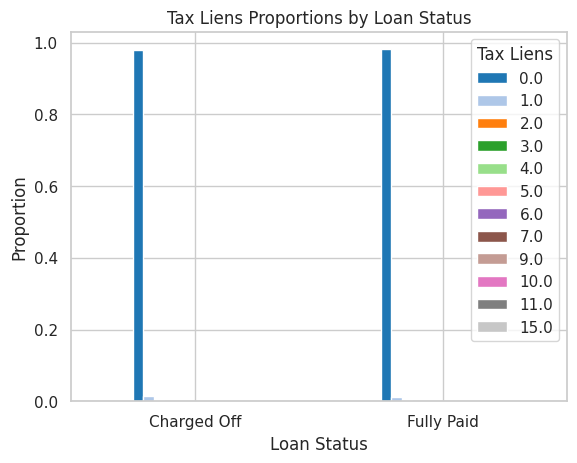

In [ ]:
custom_palette = cm.get_cmap('tab20', 15).colors

# Group by 'Loan Status' and calculate proportions of Tax Liens values
tax_lien_proportions = train_df.groupby('Loan Status')['Tax Liens'].value_counts(normalize=True).unstack()

# Plot the proportions
tax_lien_proportions.plot(kind='bar', stacked=False, color=custom_palette)
plt.title('Tax Liens Proportions by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Tax Liens')
plt.show()

Similar to Bankruptcies, the Tax Liens feature also appears to be a weak predictor of loan status on its own. The proportions of tax lien values are relatively similar between the "Charged Off" and "Fully Paid" groups

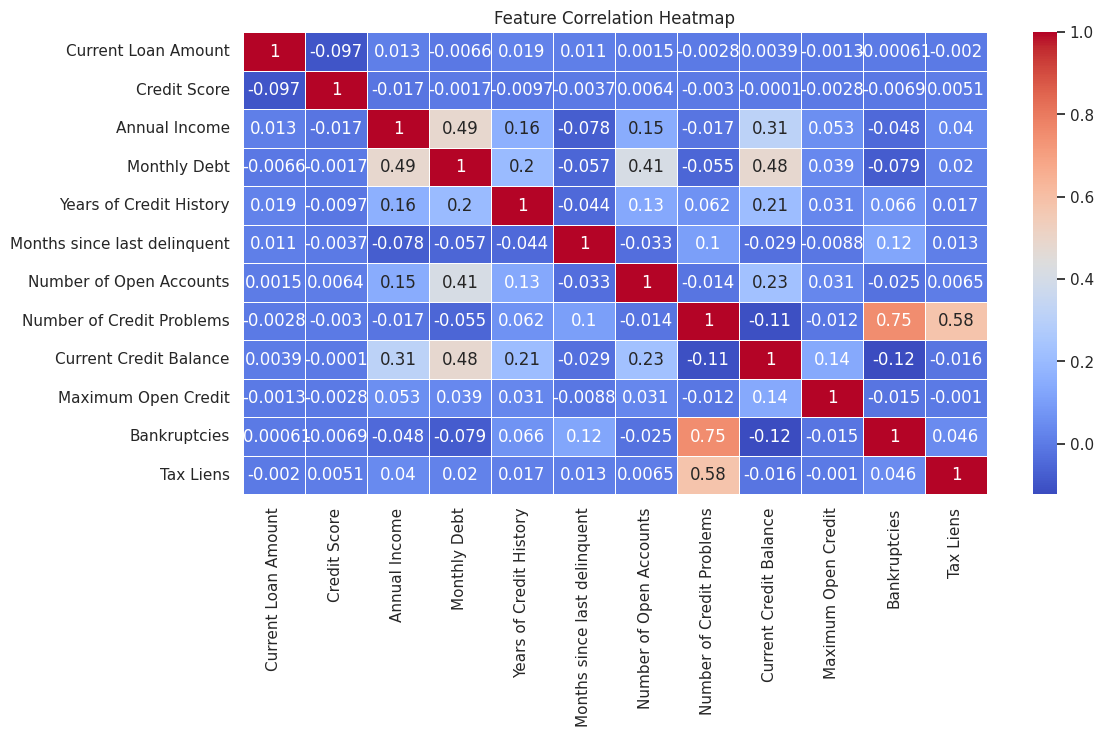

In [ ]:
numeric_features = train_df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

- Credit Score is weakly negatively correlated (-0.003) with the Number of Credit Problems, meaning that a higher credit score generally corresponds to fewer credit problems, but the relationship is very weak.</br>

- Annual Income has a weak correlation (0.013) with Current Loan Amount and Loan Approval, suggesting that other factors (e.g., credit history, debt-to-income ratio) play a more significant role in determining loan approval.</br>

- Monthly Debt and Annual Income show a moderate correlation (0.49), indicating that higher-income individuals tend to have higher monthly debts.</br>

- Bankruptcies and Number of Credit Problems are strongly correlated (0.75), meaning that individuals with more credit issues are more likely to have filed for bankruptcy.</br>

- Tax Liens and Credit Problems are also highly correlated (0.58), reinforcing that financial instability often leads to multiple financial red flags.



**Understanding Categorical Variables**
-   Years in current job         
-  Home Ownership                 
- Purpose

<ipython-input-20-8a1b07513e8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[var], order=train_df[var].value_counts().index, palette='bright')
<ipython-input-20-8a1b07513e8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[var], order=train_df[var].value_counts().index, palette='bright')
<ipython-input-20-8a1b07513e8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[var], order=train_df[var].value_counts().index, palette='bright')
<ipython-input-20-8a1b07513e8b>:8: FutureWarning: 

Passing `palett

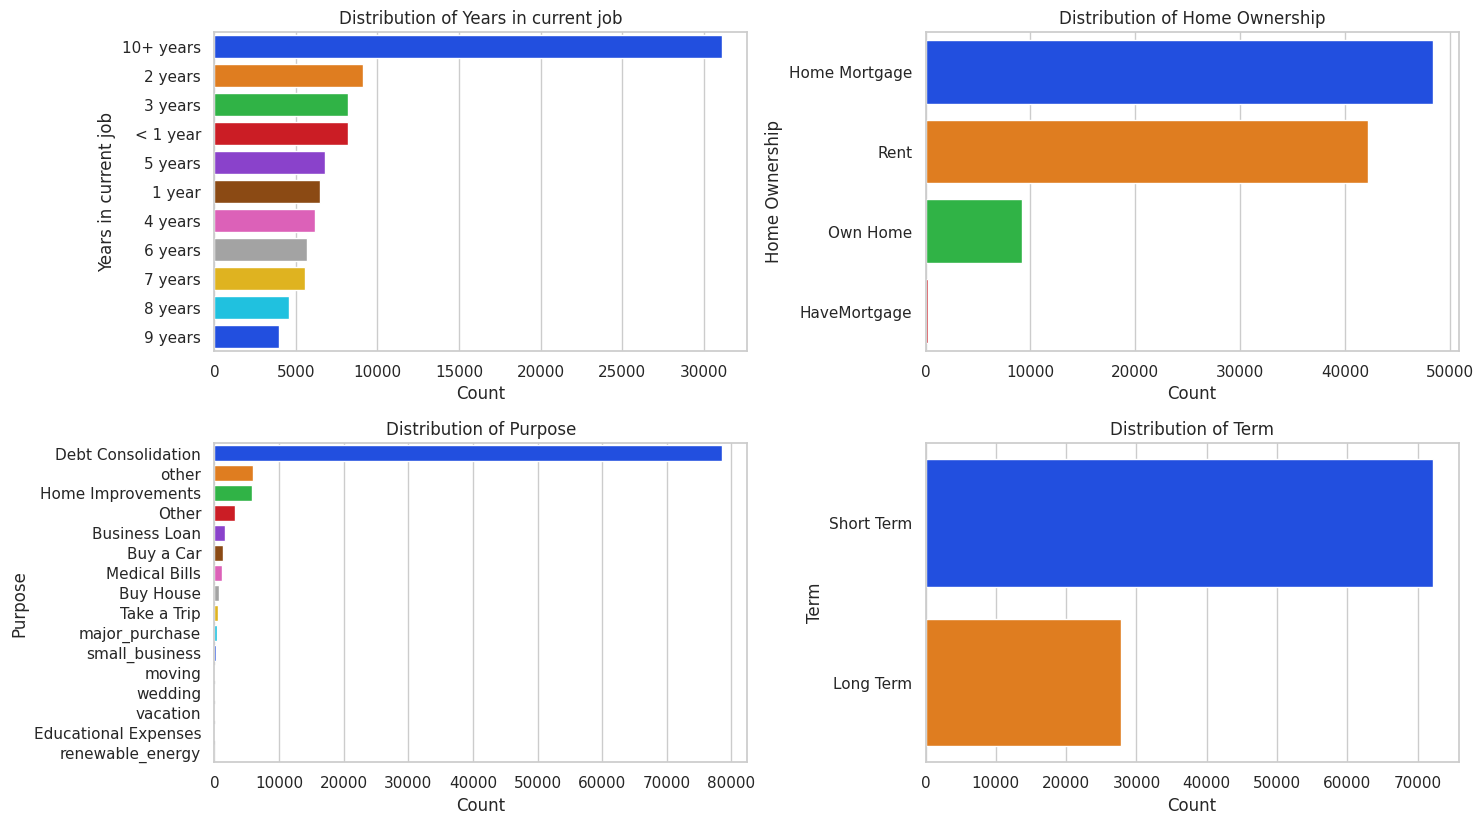

In [ ]:
categorical_vars = ['Years in current job', 'Home Ownership', 'Purpose', 'Term']

plt.figure(figsize=(15, 12))

# Plot their distributions
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=train_df[var], order=train_df[var].value_counts().index, palette='bright')
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

1. Years in Current Job
- The most common job tenure is "10+ years"
- The distribution gradually decreases as tenure length shortens.
2. Home Ownership
- Majority of the dataset took a home mortgage (loan given by a bank to purchase home) or rents.
- Few "haveMortgage"  
- We have discovered that "HaveMortgage" and "Home Mortgage" are similar, which can be confusing. Home Mortagage refers to a loan taken out for the purpose of purchasing a residential property. Have Mortagage is a broader term that can refer to any kind of mortgage loan, not just one used for purchasing a home.**


3. Purpose of Loan
- Majority apply for "Debt Consolidation", making it the dominant loan purpose.
- Less common purposes include buying a car, medical bills, vacations, and weddings


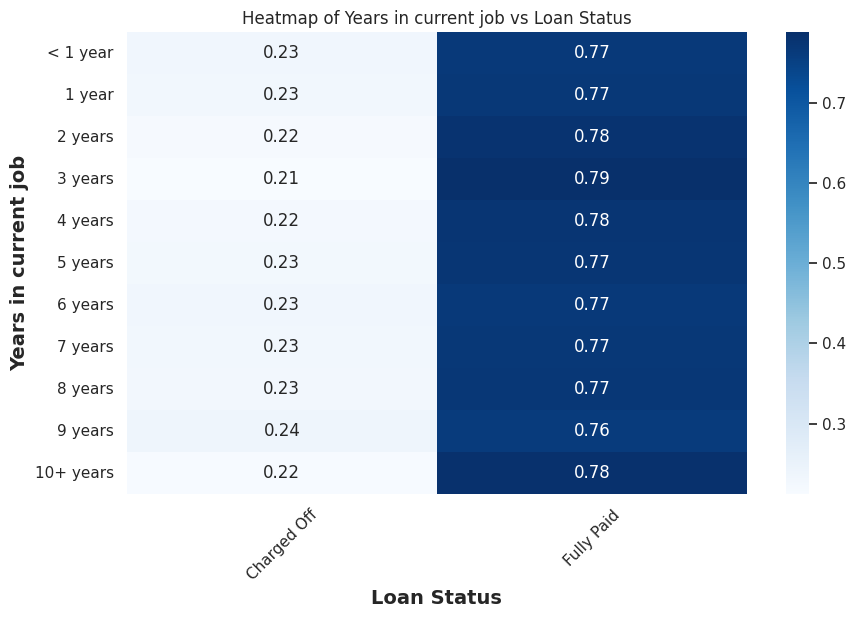

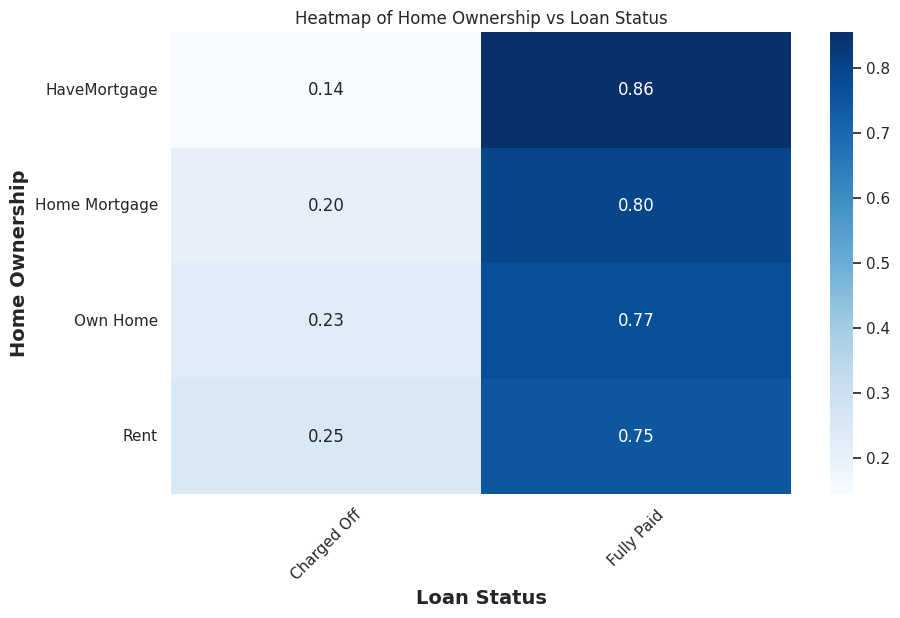

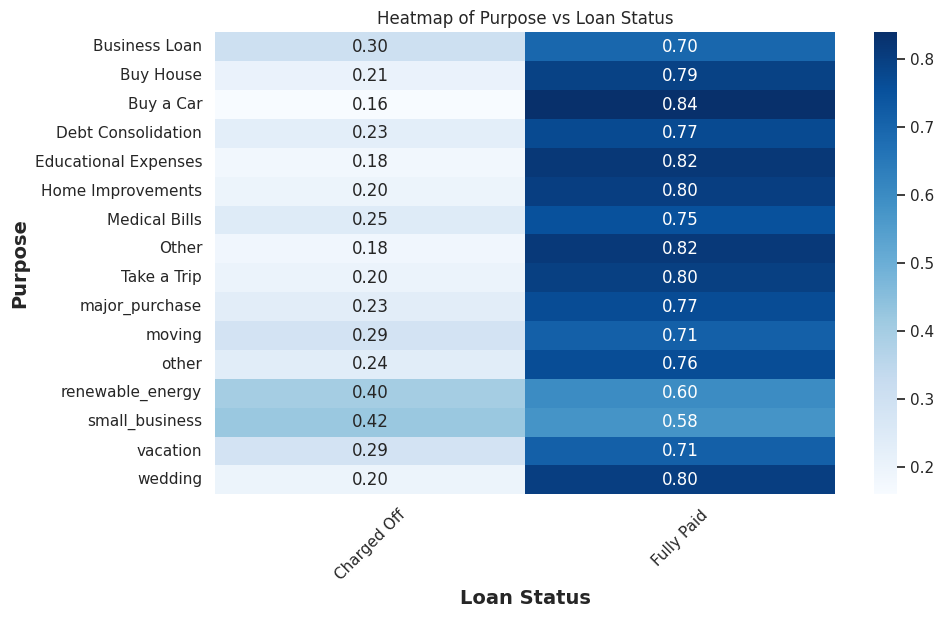

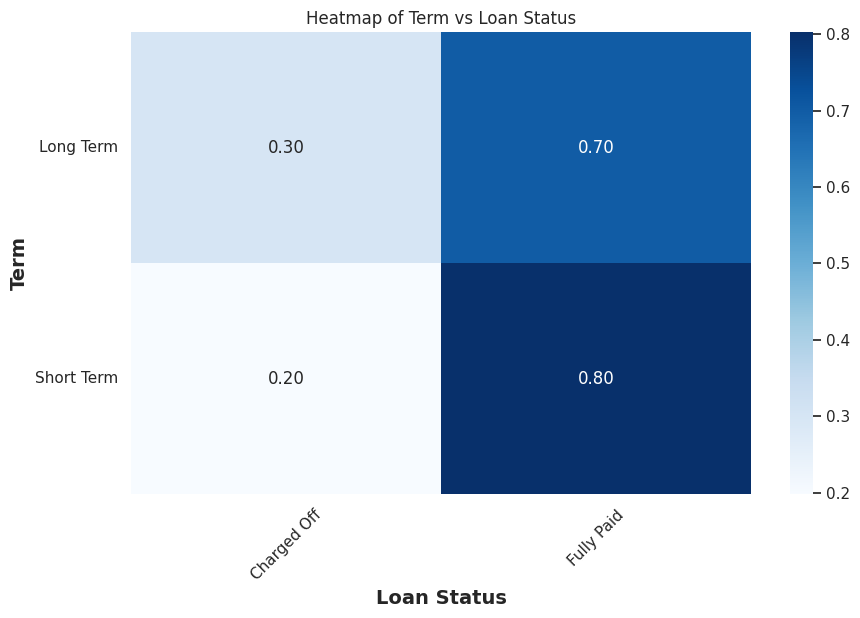

In [ ]:
target_var = "Loan Status"

#Heatmap
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    contingency_table = pd.crosstab(train_df[var], train_df[target_var], normalize="index")
    sns.heatmap(contingency_table, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"Heatmap of {var} vs {target_var}")
    plt.xlabel(target_var, fontsize=14, fontweight='bold')
    plt.ylabel(var, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    print()

**Interpretation of HeatMap**
1. Years in current job vs Loan status
- Overall, it is difficult to determine any form of trend as for each job tenure period, the distribution between charged off and fully paid is very similar.
2. Home ownership vs Loan Status
- "HaveMortgage" borrowers have the lowest default rate, meaning they are the least likely to be Charged Off (default on the loan).
- "Renters" have the highest default rate, meaning they are the most likely (among the 4 categories) to default on their loans.
3. Purpose vs Loan Status
- Business Loans, renewable energy and small_business has higher proportion of Charged Off loans, indicating a higher risk of default.
- Buying a Car has the lowest proportion of Charged Off loans, suggesting that borrowers seeking car loans tend to repay more reliably.
4. Term vs Loan Status
- Long term has a higher tendency of paying the loan
- Short term has a higher tendency of defaulting the loan


In [ ]:
train_df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


# Data Cleaning

Columns such as "Loan ID" and "Customer ID" were deemed unnecessary as they do not provide meaningful information for predicting loan outcomes and could potentially introduce bias into the model.

In [ ]:
# Drop unnecessary columns
train_df.drop(columns=["Loan ID", "Customer ID"], inplace=True)

In [ ]:
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


Additionally, we have decided to drop the col "Years in current job" because there is no relationship between it and the target variable.

In [ ]:
train_df.drop(columns=["Years in current job"], inplace=True)

In [ ]:
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


**Handling of missing numerical variables**

The column "Months since last delinquent" was dropped due to having an excessive number of missing values, making it difficult to impute reliably without distorting the data.

In [ ]:
#Too much missing value to handle appropriately
train_df.drop(columns=['Months since last delinquent'], inplace=True)
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


Based on the missing value percentage shown above, it seems like both **Credit Score** and **Annual Income** has the same **19.15** which we suspect they are both missing at the same time.

In [ ]:
def check_missing_together_percentage(df):
    both_missing_mask = df['Credit Score'].isna() & df['Annual Income'].isna()
    are_missing_together = both_missing_mask.any()
    percentage_missing = (both_missing_mask.sum() / len(df)) * 100
    return are_missing_together, percentage_missing

are_missing_together, percentage = check_missing_together_percentage(train_df)

if are_missing_together:
    print("Credit Score and Annual Income are missing together for some rows.")
    print(f"Percentage of rows with both missing simultaneously: {percentage:.2f}%")
else:
    print("Credit Score and Annual Income are not missing together for any row.")

Credit Score and Annual Income are missing together for some rows.
Percentage of rows with both missing simultaneously: 19.15%


Upon investigating the missing data, it was discovered that approximately 19% of the rows have both 'Credit Score' and 'Annual Income' missing simultaneously. We decided to drop it as we have 100,000 data to begin with which is considerable, and we believe dropping 19% of the data which might be false data would be best.

In [ ]:
print(len(train_df))

100000


In [ ]:
train_df = train_df.dropna(subset=['Credit Score', 'Annual Income'], how='any').reset_index(drop=True)
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
80841,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
80842,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
80845,Fully Paid,99999999.0,Short Term,743.0,935180.0,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
# Check for missing values in 'Credit Score' and 'Annual Income'
missing_values = train_df[['Credit Score', 'Annual Income']].isnull().sum()

# Print the results
print(missing_values)
print("length of df: " + str(len(train_df)))

Credit Score     0
Annual Income    0
dtype: int64
length of df: 80846


In [ ]:
missing_values = train_df.isnull().sum()
print(missing_values)

Loan Status                    0
Current Loan Amount            0
Term                           0
Credit Score                   0
Annual Income                  0
Home Ownership                 0
Purpose                        0
Monthly Debt                   0
Years of Credit History        0
Number of Open Accounts        0
Number of Credit Problems      0
Current Credit Balance         0
Maximum Open Credit            1
Bankruptcies                 162
Tax Liens                      6
dtype: int64


**Handling the remaining missing values in numerical variables**

To address missing values in the remaining numerical features, a median imputation strategy was employed. This approach involved replacing missing values with the median value of their respective columns. Median imputation was specifically chosen for its robustness to outliers and its ability to preserve data characteristics, particularly in the presence of skewed distributions, which we identified in our EDA portion


In [ ]:
# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='median')

# Select numerical columns with missing values
numerical_cols_with_missing = train_df.select_dtypes(include=np.number).columns[train_df.select_dtypes(include=np.number).isnull().any()]

# Fit the imputer on the numerical columns and transform the data
train_df[numerical_cols_with_missing] = imputer.fit_transform(train_df[numerical_cols_with_missing])

In [ ]:
missing_values = train_df.isnull().sum()
print(missing_values)

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64


**Handling outliers**

**Credit score**

Generally, the maximum credit score is 850. However as seen in our EDA, we have outliers at 7000.

In [ ]:
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
80841,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
80842,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
80845,Fully Paid,99999999.0,Short Term,743.0,935180.0,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
# Count rows with credit score greater than 850
num_rows_above_850 = len(train_df[train_df['Credit Score'] > 850])

# Calculate percentage
percentage_above_850 = (num_rows_above_850 / len(train_df)) * 100

# Print the results
print(f"Number of rows with credit score above 850: {num_rows_above_850}")
print(f"Percentage of rows with credit score above 850: {percentage_above_850:.2f}%")

Number of rows with credit score above 850: 4551
Percentage of rows with credit score above 850: 5.63%


In [ ]:
train_df = train_df[train_df['Credit Score'] <= 850].reset_index(drop=True)
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
76290,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
76291,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
76292,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
76293,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
76294,Fully Paid,99999999.0,Short Term,743.0,935180.0,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
max_credit_score = train_df['Credit Score'].max()
print(max_credit_score)

751.0


As seen, we have 5.63% of rows that are outliers with credit score of more than 850. Since its only 5% we can drop it without affecting our dataset much

**Current Loan Amount**

As this dataset is from world bank, we researched and found out that the MAX Loan Amount is up to six months of one's net salary. Therefore, having a loan amount of 99999999 is abnormal as that would mean that person is earning 16 million / month. We decided to replace those values with the mean as the distribution will be less skewed if we did not take the 9999... into account.

In [ ]:
# Replace 99.. with NaN to avoid it being included in the mean
train_df.loc[train_df["Current Loan Amount"] == 99999999, "Current Loan Amount"] = np.nan

# Compute the mean of "Current Loan Amount" excluding NaN values
mean_loan_amount = train_df["Current Loan Amount"].mean()
print(mean_loan_amount)

# Replace all NaN values in "Current Loan Amount" with the computed mean
train_df["Current Loan Amount"] = train_df["Current Loan Amount"].fillna(mean_loan_amount)

# Verify changes
updated_values_count = train_df["Current Loan Amount"].value_counts().head()
max_credit_score = train_df['Current Loan Amount'].max()
print(max_credit_score)

313257.7966703183
789250.0


In [ ]:
train_df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
76290,Fully Paid,147070.00000,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
76291,Fully Paid,313257.79667,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
76292,Fully Paid,103136.00000,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
76293,Fully Paid,530332.00000,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
76294,Fully Paid,313257.79667,Short Term,743.0,935180.0,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


#Feature Engineering

After cleaning the data, we realized that we can engineer new a feature '**Loan-to-income ratio**' with '**Current Loan Amount**' & '**Annual Income**'

Loan-to-Income Ratio (LTI) is a measure of how much a person borrows compared to their income. It helps assess affordability and financial risk. A high LTI means the borrower has a high debt burden compared to income, making them more likely to default.

In [ ]:
# Calculate LTI
train_df['LTI'] = train_df['Current Loan Amount'] / train_df['Annual Income']

train_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,LTI
0,Fully Paid,445412.00000,Short Term,709.0,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0.381511
1,Fully Paid,313257.79667,Short Term,741.0,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0.140355
2,Fully Paid,347666.00000,Long Term,721.0,806949.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0.430840
3,Fully Paid,217646.00000,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,0.183793
4,Fully Paid,548746.00000,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0.214428


We can also engineer another feature '**Credit Score to Loan** using '**Credit Score**' & '**Current Loan Amount**'

Credit Score to Loan Ratio is a measure of a borrower's creditworthiness relative to the loan amount. A high ratio generally suggests lower risk and a greater likelihood of repayment.

In [ ]:
# Calculate 'Credit Score to Loan' ratio
train_df['Credit Score to Loan'] = train_df['Credit Score'] / train_df['Current Loan Amount']

train_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,LTI,Credit Score to Loan
0,Fully Paid,445412.00000,Short Term,709.0,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0.381511,0.001592
1,Fully Paid,313257.79667,Short Term,741.0,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0.140355,0.002365
2,Fully Paid,347666.00000,Long Term,721.0,806949.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0.430840,0.002074
3,Fully Paid,217646.00000,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,0.183793,0.003354
4,Fully Paid,548746.00000,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0.214428,0.001236


#Post Exploratory Analysis (after data cleaning & feature engineering)

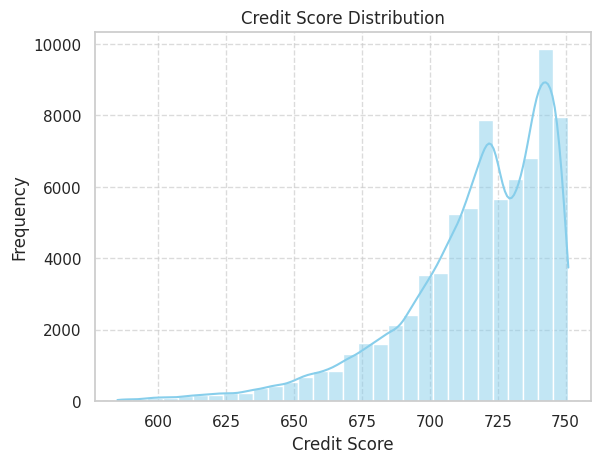

In [ ]:
sns.histplot(train_df['Credit Score'], bins=30, kde=True, color='skyblue')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

As seen above, there are no outliers of credit score >= 850.

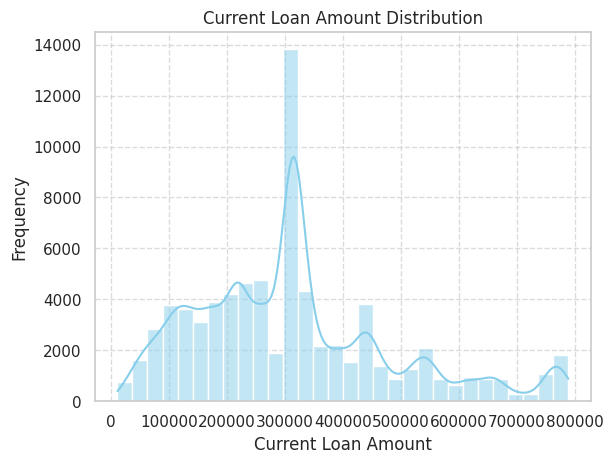

In [ ]:
sns.histplot(train_df['Current Loan Amount'], bins=30, kde=True, color='skyblue')
plt.title('Current Loan Amount Distribution')
plt.xlabel('Current Loan Amount')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

As you can see in the above graph, there are no outliers (99999999).

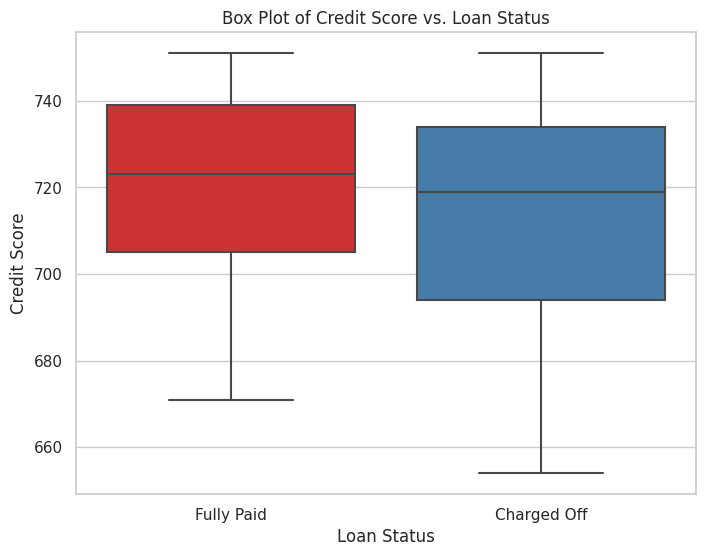

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Status', y='Credit Score', data=train_df, hue='Loan Status', palette='Set1', linewidth=1.5, whis=1.0, showfliers=False, legend=False)  # Removed scaling
plt.title('Box Plot of Credit Score vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

As seen above, our cleaned data shows a relationship of - as one's credit score is higher, it is more likely that the loan will be fully paid.

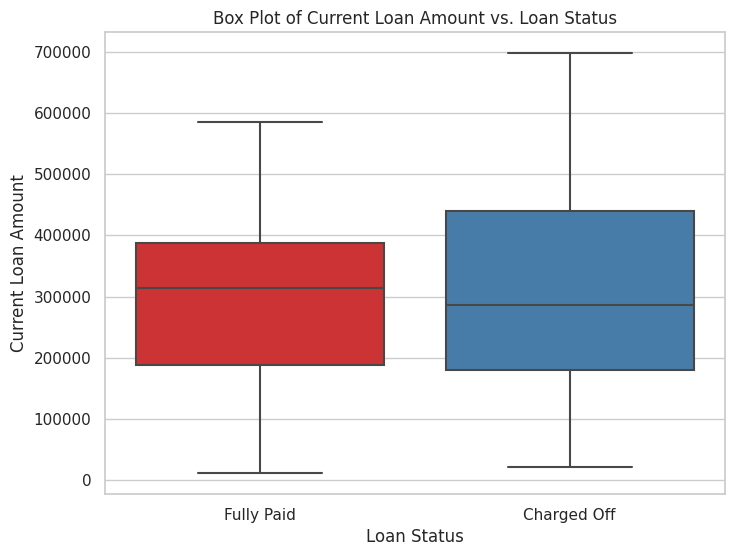

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan Status', y='Current Loan Amount', data=train_df, hue='Loan Status', palette='Set1', linewidth=1.5, whis=1.0, showfliers=False, legend=False)  # Removed scaling
plt.title('Box Plot of Current Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Current Loan Amount')
plt.show()

After we cleaned our data, the above plot made a lot more sense to us as we can see a relationship of - as current loan amount increases, it is more likely to be defaulted (charged off).

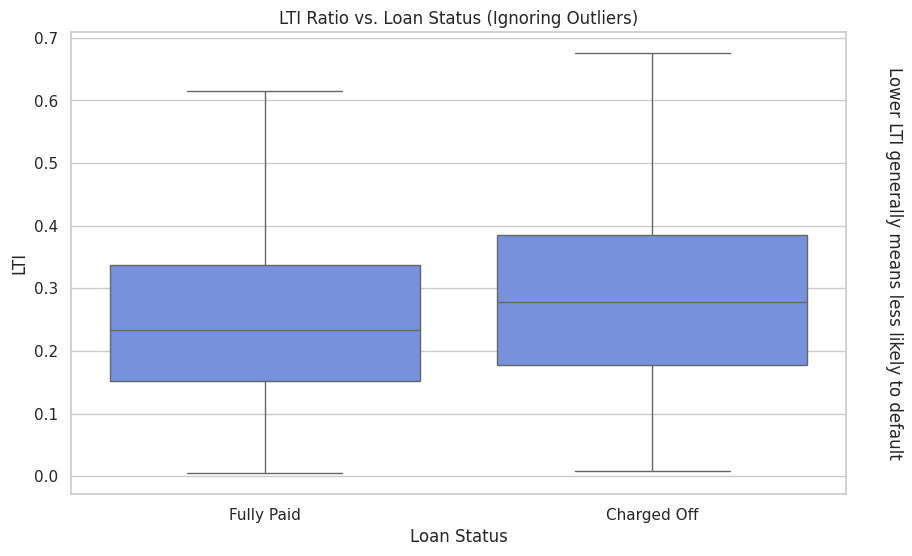

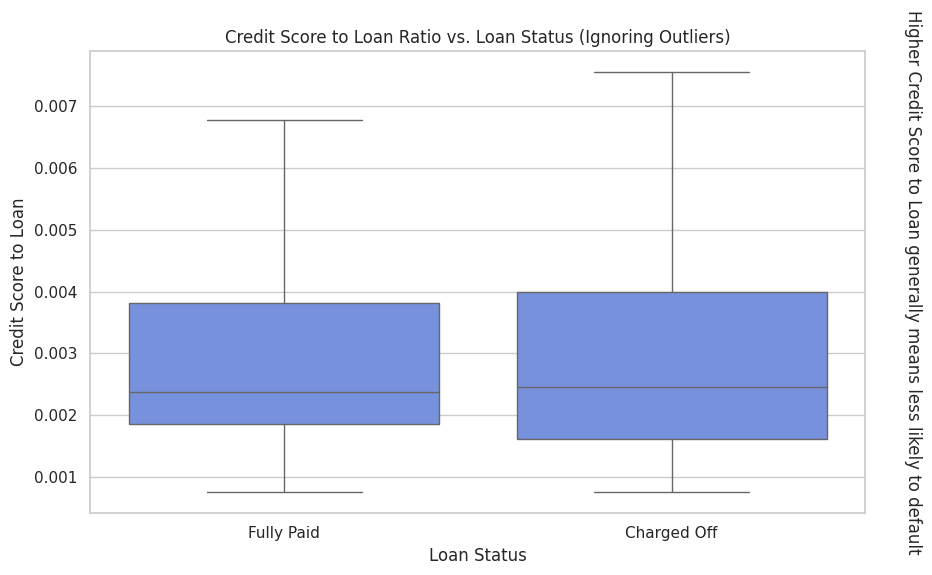

In [ ]:
# LTI Ratio vs. Loan Status (Box Plot, Ignoring Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Status', y='LTI', data=train_df, showfliers=False)
plt.title('LTI Ratio vs. Loan Status (Ignoring Outliers)')
plt.text(1.05, 0.5, 'Lower LTI generally means less likely to default', transform=plt.gca().transAxes, ha='left', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8), rotation=270)  # Add annotation on the right, rotated and facing the plot
plt.show()

# Credit Score to Loan Ratio vs. Loan Status (Box Plot, Ignoring Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Status', y='Credit Score to Loan', data=train_df, showfliers=False)
plt.title('Credit Score to Loan Ratio vs. Loan Status (Ignoring Outliers)')
plt.text(1.05, 0.5, 'Higher Credit Score to Loan generally means less likely to default', transform=plt.gca().transAxes, ha='left', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8), rotation=270)  # Add annotation on the right, rotated and facing the plot
plt.show()

For **Loan-to-income ratio** we can slightly see that lower LTI ratios generally correspond to a higher likelihood of fully repaid loans.

Unfortunately for **Credit Score to Loan ratio** we see a counterintuitive trend where higher ratios are associated with more defaults of loans, which contradicts our expectation of the relationship.

Therefore we will only use **Loan-to-income ratio** in our model

<Axes: xlabel='Loan Status', ylabel='Term'>

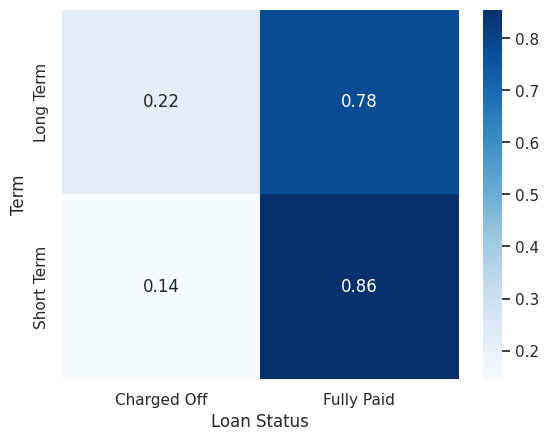

In [ ]:
heatmap_data = pd.crosstab(train_df["Term"], train_df["Loan Status"],normalize="index" )
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues")

As seen above, when we compare short and long term, if the loan is short term, there is a higher probability that it will be fully paid, comapred to if the term was long term. (0.86 > 0.78)

<Axes: xlabel='Loan Status', ylabel='Home Ownership'>

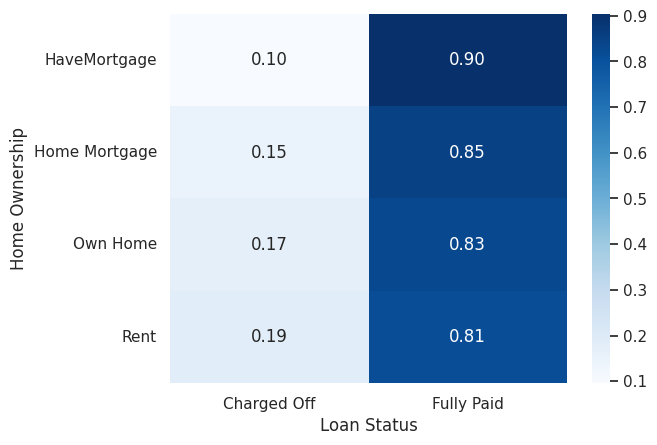

In [ ]:
heatmap_data = pd.crosstab(train_df["Home Ownership"], train_df["Loan Status"],normalize="index" )
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues")

Borrowers with "HaveMortgage" have the highest repayment rate (90%), indicating they may be the most reliable group. "Renters" have the highest default rate (19%), suggesting higher credit risk.

#Data preprocessing

In [ ]:
train_df['Loan Status'] = train_df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})
train_df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,LTI,Credit Score to Loan
0,1,445412.00000,Short Term,709.0,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0.381511,0.001592
1,1,313257.79667,Short Term,741.0,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0.140355,0.002365
2,1,347666.00000,Long Term,721.0,806949.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0.430840,0.002074
3,1,217646.00000,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,0.183793,0.003354
4,1,548746.00000,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0.214428,0.001236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76290,1,147070.00000,Short Term,725.0,475437.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,0.309336,0.004930
76291,1,313257.79667,Short Term,732.0,1289416.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,0.242945,0.002337
76292,1,103136.00000,Short Term,742.0,1150545.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,0.089641,0.007194
76293,1,530332.00000,Short Term,746.0,1717524.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0.308777,0.001407


**Train test split**

In [ ]:
selected_features = ['Credit Score', 'Annual Income', 'Current Loan Amount', 'Years of Credit History', 'LTI', 'Term', 'Home Ownership']
X = train_df[selected_features]  # Features
y = train_df['Loan Status']  # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (61036, 7)
X_test shape: (15259, 7)
y_train shape: (61036,)
y_test shape: (15259,)


In [ ]:
# Original dataset
original_proportions = train_df['Loan Status'].value_counts(normalize=True)
print("Original Proportions:\n", original_proportions)

# Training set
train_proportions = y_train.value_counts(normalize=True)
print("\nTraining Set Proportions:\n", train_proportions)

# Test set
test_proportions = y_test.value_counts(normalize=True)
print("\nTest Set Proportions:\n", test_proportions)

Original Proportions:
 Loan Status
1    0.834078
0    0.165922
Name: proportion, dtype: float64

Training Set Proportions:
 Loan Status
1    0.834082
0    0.165918
Name: proportion, dtype: float64

Test Set Proportions:
 Loan Status
1    0.834065
0    0.165935
Name: proportion, dtype: float64


## Data balancing
Upsampling

In [ ]:
# Upsample the minority class ('Charged Off') in the training set
charged_off_train = X_train[y_train == 0]  # Charged Off instances in training set
fully_paid_train = X_train[y_train == 1]  # Fully Paid instances in training set

charged_off_upsampled = resample(charged_off_train,
                                 replace=True,
                                 n_samples=len(fully_paid_train),
                                 random_state=42)

# Combine upsampled minority with majority in the training set
X_train_upsampled = pd.concat([fully_paid_train, charged_off_upsampled])
y_train_upsampled = pd.concat([y_train[y_train == 1], pd.Series([0] * len(charged_off_upsampled))])

# Before upsampling
print("Before Upsampling:")
print(y_train.value_counts())

# After upsampling
print("\nAfter Upsampling:")
print(y_train_upsampled.value_counts())

Before Upsampling:
Loan Status
1    50909
0    10127
Name: count, dtype: int64

After Upsampling:
1    50909
0    50909
Name: count, dtype: int64


In [ ]:
X_train_upsampled

,Credit Score,Annual Income,Current Loan Amount,Years of Credit History,LTI,Term,Home Ownership
34602,691.0,817988.0,161194.0,21.5,0.197062,Long Term,Home Mortgage
26381,692.0,1488840.0,333674.0,14.1,0.224117,Long Term,Rent
31618,669.0,714286.0,272932.0,24.5,0.382105,Long Term,Own Home
5335,720.0,1456065.0,324236.0,33.1,0.222680,Long Term,Home Mortgage
26277,743.0,929480.0,302962.0,17.4,0.325948,Short Term,Rent
...,...,...,...,...,...,...,...
6696,675.0,940120.0,172546.0,9.8,0.183536,Long Term,Own Home
65671,736.0,301663.0,87318.0,49.0,0.289455,Short Term,Own Home
20985,719.0,583908.0,214104.0,7.3,0.366674,Short Term,Rent
20962,709.0,1802530.0,174702.0,18.5,0.096920,Short Term,Own Home


## SMOTENC
SMOTE is generally considered more effective than random oversampling because it creates new instances that are more likely to be representative of the minority class, thereby improving the model's ability to generalize

In [ ]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Label encode categorical columns
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    le_dict[col] = le

# Get categorical column indices
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# Initialize SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Apply SMOTENC (only on training data!)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

In [ ]:
print("Home Ownership mapping:", le_dict["Home Ownership"].classes_)
print("Term mapping:", le_dict["Term"].classes_)

Home Ownership mapping: ['HaveMortgage' 'Home Mortgage' 'Own Home' 'Rent']
Term mapping: ['Long Term' 'Short Term']


The above means that from left to right, 'HaveMortgage' is assigned value 0, 'Rent' is assigned value 3.

Same for Term mapping.

In [ ]:
X_train_smote.shape

(101818, 7)

In [ ]:
print(y_train_smote.shape)
print(y_train_smote.value_counts())

(101818,)
Loan Status
1    50909
0    50909
Name: count, dtype: int64


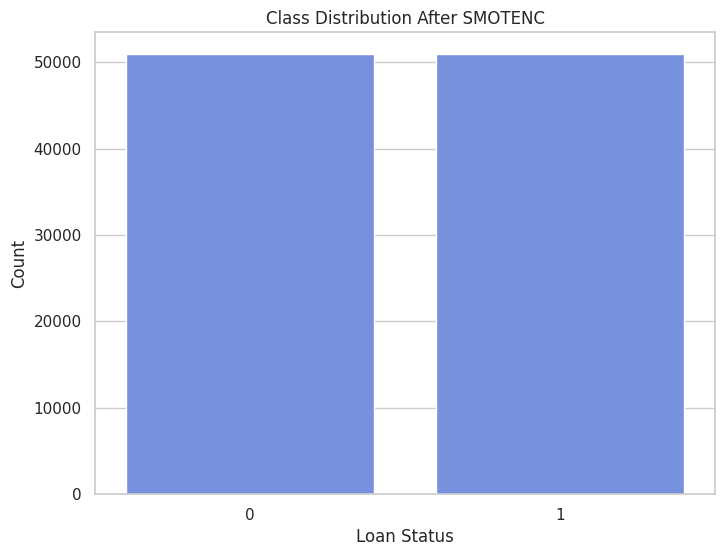

In [ ]:
# Plot the distribution of the target variable after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)  # y_train_smote is the target after SMOTE
plt.title('Class Distribution After SMOTENC')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train_smote

,Credit Score,Annual Income,Current Loan Amount,Years of Credit History,LTI,Term,Home Ownership
0,691.000000,8.179880e+05,161194.000000,21.500000,0.197062,0,1
1,692.000000,1.488840e+06,333674.000000,14.100000,0.224117,0,3
2,669.000000,7.142860e+05,272932.000000,24.500000,0.382105,0,2
3,720.000000,1.456065e+06,324236.000000,33.100000,0.222680,0,1
4,732.000000,7.711720e+05,334862.000000,26.400000,0.434225,1,3
...,...,...,...,...,...,...,...
101813,727.306991,1.047190e+06,264550.785107,10.310233,0.252629,1,3
101814,727.558785,2.169720e+06,351838.837153,23.832170,0.162156,0,1
101815,731.801683,7.493389e+05,369893.931557,14.952437,0.493634,0,2
101816,723.236864,1.457533e+06,351723.110076,17.837114,0.241310,0,3


## Normalise & Standadise

In [ ]:
def preprocess_scale_data(X_train, y_train, numeric_cols, scale_type="standard"):
    """
    Scales numeric columns in X_train using either StandardScaler or MinMaxScaler.

    """
    X_train_scaled = X_train.copy()

    if scale_type == "standard":
        scaler = StandardScaler()
    elif scale_type == "minmax":
        scaler = MinMaxScaler()
    else:
        raise ValueError("scale_type must be either 'standard' or 'minmax'")

    # Fit & transform on training data
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

    return X_train_scaled, scaler, y_train


In [ ]:
numeric_cols = ['Credit Score', 'Annual Income', 'Current Loan Amount',
                'Years of Credit History', 'LTI']

# Standardize
X_train_std, std_scaler, y_train_std = preprocess_scale_data(X_train_smote, y_train_smote, numeric_cols, scale_type="standard")

# Normalize
X_train_norm, norm_scaler, y_train_norm = preprocess_scale_data(X_train_smote, y_train_smote, numeric_cols, scale_type="minmax")

After researching, we discovered that

If we’re using Logistic Regression, SVM, or PCA, → go with StandardScaler

If we’re using KNN, Neural Networks, → try MinMaxScaler

If we're using tree-based models,	No scaling needed

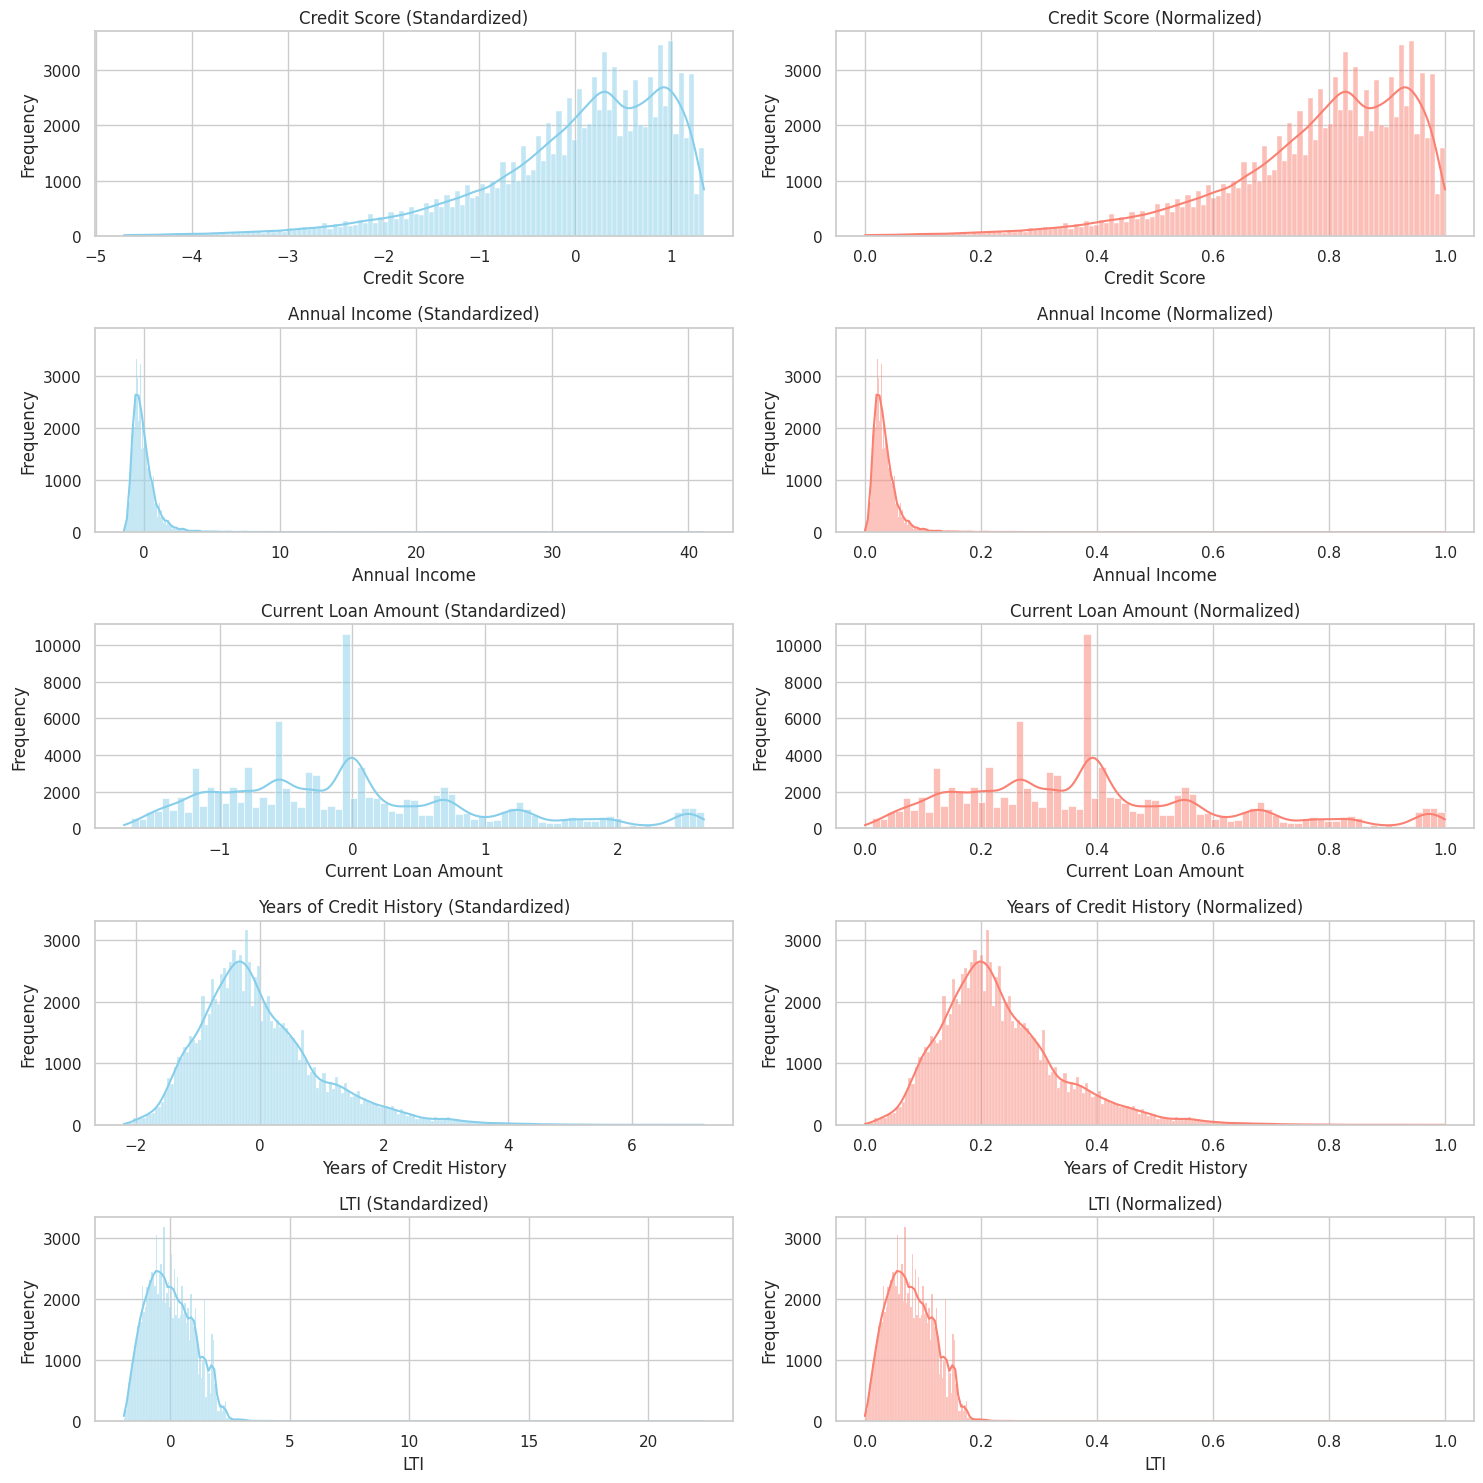

In [ ]:
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(15, 15))

# Plot distributions for standardized data
for i, col in enumerate(numeric_cols):
    sns.histplot(X_train_std[col], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'{col} (Standardized)')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

# Plot distributions for normalized data
for i, col in enumerate(numeric_cols):
    sns.histplot(X_train_norm[col], ax=axes[i, 1], kde=True, color='salmon')
    axes[i, 1].set_title(f'{col} (Normalized)')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Machine Learning

**Models chosen and it's considerations**</br>
</br>
**Dummy classfier** –  serves as a simple baseline to compare against other more complex classifiers.
</br>
**Logistic Regression** – Simple, interpretable, but may struggle with non-linear relationships.</br>
**Random Forest** – An ensemble method, reduces overfitting, and handles imbalanced data well. </br>
**XG boost** – is a powerful gradient boosting algorithm renowned for its accuracy and ability to handle complex relationships in data

## Dummy Classifier

We chose dummy classifier to act as our baseline model.

In [ ]:

dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train_smote, y_train_smote)

# Predict on test data (original distribution)
y_pred_dummy = dummy.predict(X_test)

print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.16      0.50      0.25      2532
           1       0.83      0.50      0.62     12727

    accuracy                           0.50     15259
   macro avg       0.50      0.50      0.43     15259
weighted avg       0.72      0.50      0.56     15259



This classifier predicts class labels randomly, with uniform probability across all classes. It doesn't learn anything from the training data — it's a baseline to compare yur real model against.

So if we have two classes (0 and 1), it randomly guesses 0 or 1 with a 50-50 chance for each prediction.
<br>
Therefore, overall accuracy: 50%.





---



## Logistic Regression

We chose logistic regresion instead of linear as we want to predict categorical outcomes (loan default or repayment). Whereas linear Regression is more suitable for predicting continuous or numerical values

In [ ]:
numeric_cols

['Credit Score',
 'Annual Income',
 'Current Loan Amount',
 'Years of Credit History',
 'LTI']

In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_std, y_train_std)

X_test_standardized = X_test.copy()
X_test_standardized[numeric_cols] = std_scaler.transform(X_test[numeric_cols])

# Predict on standardized validation (test) data
y_pred_log = log_model.predict(X_test_standardized)

# Evaluate model performance
print("Logistic Regression Performance (Standardized Data):")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance (Standardized Data):
              precision    recall  f1-score   support

           0       0.21      0.55      0.31      2532
           1       0.87      0.59      0.70     12727

    accuracy                           0.58     15259
   macro avg       0.54      0.57      0.50     15259
weighted avg       0.76      0.58      0.63     15259



As this is a baseline model for logistic regression, w/o tuning the hyper params, the accuracy of 0.58 is expected.



In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
    'penalty': ['l1', 'l2'],                   # L1 or L2 regularization
    'solver': ['liblinear'],                   # 'liblinear' supports both l1 and l2
}


log_model = LogisticRegression(max_iter=500)


grid_search = GridSearchCV(estimator=log_model,
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit grid search on standardized training data
grid_search.fit(X_train_std, y_train_std)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_


y_pred_best_lr = best_lr.predict(X_test_standardized)


print("Best Logistic Regression Performance (Standardized Data):")
print(classification_report(y_test, y_pred_best_lr))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Performance (Standardized Data):
              precision    recall  f1-score   support

           0       0.21      0.56      0.31      2532
           1       0.87      0.59      0.70     12727

    accuracy                           0.58     15259
   macro avg       0.54      0.57      0.50     15259
weighted avg       0.76      0.58      0.63     15259



We used "macro_f1" as our scoring metric as we want to give equal weight to each class (simple average of F1s). Because we have a class imbalance.


After we use gridsearch to find the best params, the Logistic Regression model achieved a modest accuracy of 58% and a macro F1-score of 0.50, indicating that it struggles to balance performance across both classes. While it performed well in terms of precision for the majority class (class 1: 0.87), its recall was only 0.59, and its performance on the minority class (class 0) was weak — with an F1-score of just 0.31. This suggests the model is biased toward the majority class and is not effective at identifying minority class instances (likely loan defaults), making it less suitable for imbalanced datasets without further adjustment.

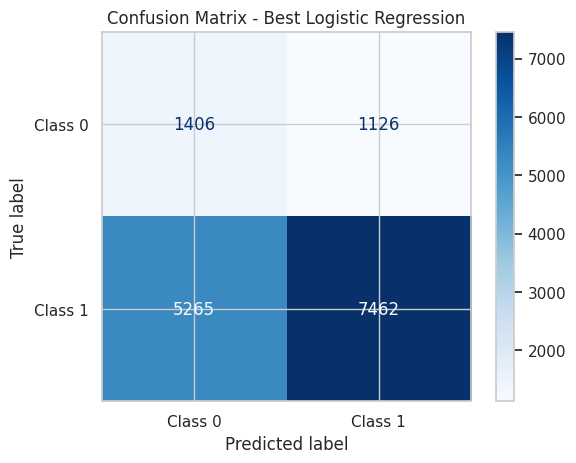

In [ ]:

ConfusionMatrixDisplay.from_estimator(
    best_lr,
    X_test_standardized,
    y_test,
    display_labels=["Class 0", "Class 1"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Best Logistic Regression")
plt.show()



---



## Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.33      0.43      0.38      2532
           1       0.88      0.83      0.85     12727

    accuracy                           0.76     15259
   macro avg       0.61      0.63      0.62     15259
weighted avg       0.79      0.76      0.77     15259



**Overall Performance:**

- Accuracy: The model has an accuracy of 0.76, meaning it correctly predicts the loan status for 76% of the cases in the test dataset.
- The model is much better than DummyClassifier or Logistic Regression, especially on Class 0 (f1 score of 0.38 of rf > f1 score of 0.31 of lr)

In [ ]:

param_grid = {
    'n_estimators': [100, 200],            # number of trees
    'max_depth': [None, 10, 20],            # tree depth
    'min_samples_split': [2, 5],            # min samples to split a node
    'min_samples_leaf': [1, 2],              # min samples at a leaf node
    'max_features': ['sqrt', 'log2']    # features considered for best split
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,              # parallel computation (use all cores)
    scoring='f1_macro',
    verbose=2
)

# Fit grid search on SMOTE data
grid_search.fit(X_train_smote, y_train_smote)


best_rf = grid_search.best_estimator_


y_pred_best_rf = best_rf.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.34      0.42      0.38      2532
           1       0.88      0.83      0.86     12727

    accuracy                           0.77     15259
   macro avg       0.61      0.63      0.62     15259
weighted avg       0.79      0.77      0.78     15259



The Random Forest model achieved strong overall performance with an accuracy of 77% and a macro F1-score of 0.62, outperforming XGBoost in this task. It showed particularly high precision (0.88) and F1-score (0.86) for the majority class, while also improving minority class (class 0) detection with a higher F1-score (0.38) compared to XGBoost’s (0.30). This indicates that Random Forest was more effective at balancing performance across both classes, making it better suited for handling the imbalanced nature of the dataset.

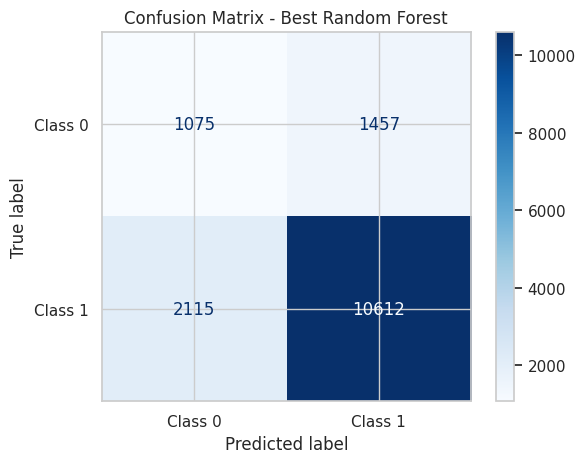

In [ ]:

ConfusionMatrixDisplay.from_estimator(
    best_rf,
    X_test,
    y_test,
    display_labels=["Class 0", "Class 1"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Best Random Forest")
plt.show()



---



#### XG BOOST

In [ ]:

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train on SMOTE-augmented training data
xgb_model.fit(X_train_smote, y_train_smote)


y_pred_xgb = xgb_model.predict(X_test)


print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.26      0.35      0.30      2532
           1       0.86      0.81      0.83     12727

    accuracy                           0.73     15259
   macro avg       0.56      0.58      0.57     15259
weighted avg       0.76      0.73      0.74     15259



In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0,1],
    'min_child_weight': [1,3]
}


xgb_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Grid search with reduced CV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=2,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train_smote, y_train_smote)


best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)


print("Best Hyperparameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_xgb))

Fitting 2 folds for each of 192 candidates, totalling 384 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.27      0.34      0.30      2532
           1       0.86      0.81      0.84     12727

    accuracy                           0.74     15259
   macro avg       0.56      0.58      0.57     15259
weighted avg       0.76      0.74      0.75     15259



Despite XGBoost’s reputation as a powerful gradient boosting model, it was surprisingly outperformed by Random Forest in this task. While XGBoost achieved decent performance on the majority class (class 1), it struggled more with the minority class (class 0) — yielding a lower F1-score of 0.30 compared to Random Forest’s 0.38.

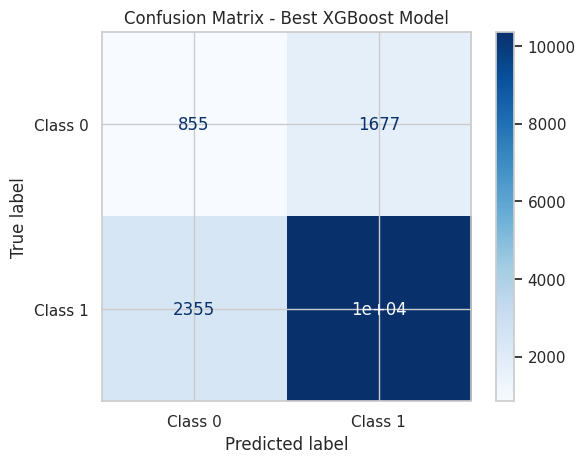

In [ ]:

ConfusionMatrixDisplay.from_estimator(
    best_xgb,
    X_test,
    y_test,
    display_labels=["Class 0", "Class 1"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Best XGBoost Model")
plt.show()

#Most influential features


Feature Importance:
                   Feature  Importance
2      Current Loan Amount    0.240747
0             Credit Score    0.211651
1            Annual Income    0.185530
4                      LTI    0.175914
3  Years of Credit History    0.149094
6           Home Ownership    0.022716
5                     Term    0.014347
Correlation between Credit Score and Loan Status: 0.1016411578585206
Correlation between Annual Income and Loan Status: 0.06246751955801019
Correlation between Current Loan Amount and Loan Status: -0.028003049855965172
Correlation between Years of Credit History and Loan Status: 0.018850894549028187
Correlation between LTI and Loan Status: -0.07781827371556356
Skipping correlation for categorical feature: Term
Skipping correlation for categorical feature: Home Ownership


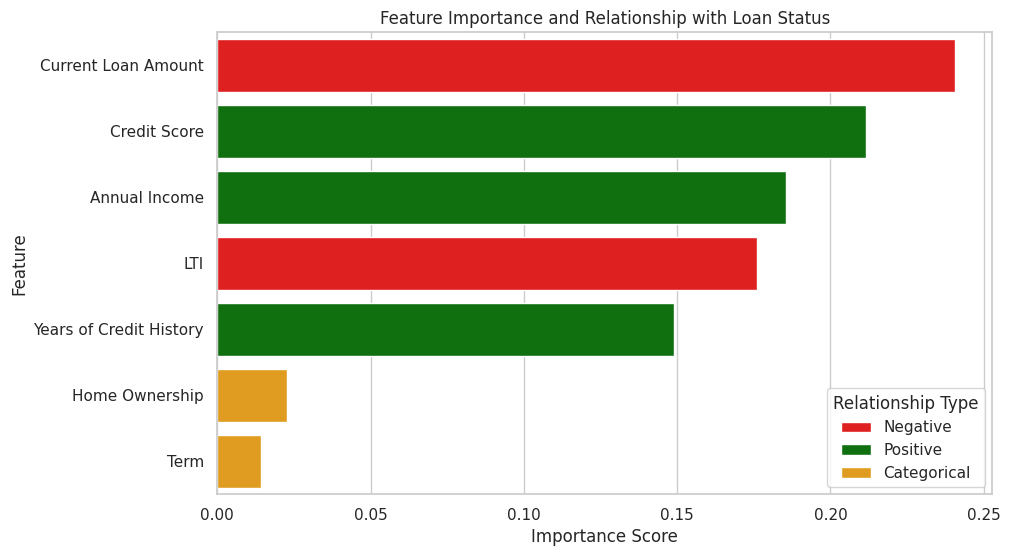

In [ ]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = X_train_smote.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# Correlation Analysis
correlation_results = {}
for feature in feature_names:
    if pd.api.types.is_numeric_dtype(train_df[feature]):
        correlation = train_df[feature].corr(train_df['Loan Status'])
        correlation_results[feature] = correlation
        print(f"Correlation between {feature} and Loan Status: {correlation}")
    else:
        print(f"Skipping correlation for categorical feature: {feature}")

# Visualization
features = feature_importance_df['Feature']
importances = feature_importance_df['Importance']
relationship_types = []

for feature in features:
    if feature in correlation_results:
        if correlation_results[feature] > 0:
            relationship_types.append('Positive')
        elif correlation_results[feature] < 0:
            relationship_types.append('Negative')
        else:
            relationship_types.append('Contradictory/Weak')
    else:
        relationship_types.append('Categorical')

palette = {'Positive': 'green', 'Negative': 'red', 'Contradictory/Weak': 'blue', 'Categorical': 'orange'}

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, hue=relationship_types, palette=palette, dodge=False)
plt.title('Feature Importance and Relationship with Loan Status')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend(title='Relationship Type')
plt.show()

**Please Ignore the categorical variables as show above in yellow**

In [ ]:
print("\nCombined Interpretation (for top features):")
for index, row in feature_importance_df.head(5).iterrows():
    feature = row['Feature']
    if feature in correlation_results:
        importance_type = ""
        if correlation_results[feature] > 0:
            importance_type = "positive"
        elif correlation_results[feature] < 0:
            importance_type = "negative"
        else:
            importance_type = "contradictory or weak"

        print(f"- {feature} has a {importance_type} relationship with Loan Status (Importance: {row['Importance']:.4f}).")
    else:
        print(f"- {feature} is a categorical feature (Importance: {row['Importance']:.4f}). Consider further analysis.")


Combined Interpretation (for top features):
- Current Loan Amount has a negative relationship with Loan Status (Importance: 0.2407).
- Credit Score has a positive relationship with Loan Status (Importance: 0.2117).
- Annual Income has a positive relationship with Loan Status (Importance: 0.1855).
- LTI has a negative relationship with Loan Status (Importance: 0.1759).
- Years of Credit History has a positive relationship with Loan Status (Importance: 0.1491).


#Conclusion

This project aimed to develop a machine learning model for loan prediction, specifically focusing on identifying factors that influence loan repayment or default. Using a Random Forest classifier (our best model) trained on a dataset of loan applications, we achieved a model capable of making predictions with reasonable accuracy.

**Key Findings:**

Feature Importance: The model identified 'Current Loan Amount,' 'Credit Score,' 'Annual Income,' 'Loan-to-Income Ratio (LTI),' and 'Years of Credit History' as the most important features influencing loan status. We also included the categorical features (term & Home Ownership) as it gave us a much better macro f1 score and acc.

**Relationship Direction:**

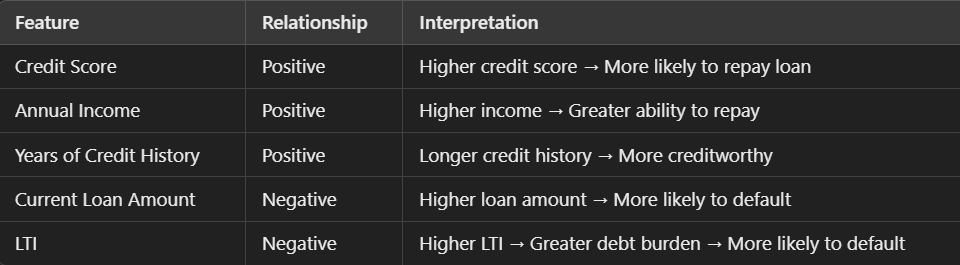

**Recommendation**

Based on these findings, we recommend the following for loan approval decisions and risk management:

- Prioritize Applicants with High Credit Scores
 - Credit score showed a strong positive relationship with loan repayment. Approving loans for individuals with higher scores increases the likelihood of repayment.


- Favour Applicants with Higher Annual Incomes
 - Higher income levels indicate greater financial capacity to service loans. Applicants with stable, sufficient income should be prioritized.


- Consider Credit History Length
 - A longer credit history suggests more experience with managing credit and is associated with lower default risk. Applicants with a well-established credit history are more reliable.


- Exercise Caution with High Loan Amounts
 - Larger loan amounts are linked to a higher chance of default. If the bank chooses to approve a high-value loan, it should apply stricter risk assessment measures such as enhanced income verification or requiring collateral.


- Monitor and implement Manual review for High Loan-to-Income (LTI) Ratios
 - A high LTI ratio indicates that a borrower is heavily burdened by debt relative to their income, which significantly increases default risk. Applicants with lower LTI ratios are more financially balanced and less likely to default.



**Final Thoughts**

This project demonstrates the potential of machine learning in loan prediction and risk assessment. By leveraging data-driven insights, financial institutions can make more informed decisions, reduce financial losses, and enhance customer satisfaction.

**Future Directions:**

- Advanced Feature Engineering: Explore techniques like polynomial features, interaction terms, or domain-specific features to potentially improve model performance.

- Algorithm Exploration: Investigate other algorithms like, LightGBM, or Support Vector Machines for potentially better loan prediction accuracy.

- Real-time & Economic Data: Develop strategies to incorporate real-time data and external economic factors into the model.

- Cluster borrowers into distinct segments (e.g., students, salaried workers, self-employed) and build customized models per segment.
This improves accuracy by applying different risk profiles to different borrower types, which enables more targeted risk management strategies.


##**Key Learning Points from this Project**

Working on this data science project taught us a lot about how important each step of the process is. From cleaning raw data to building and evaluating models, every decision had an impact on the final outcome.

Here are our main takeaways:

**1. Data Exploration Matters:**
We realized early on that understanding the data is key. Just jumping into modeling without checking for outliers or weird values can lead to poor results. In our case, identifying unrealistic credit scores and placeholder loan amounts helped us clean the data properly. For example, we replaced extreme loan values with the mean and removed scores above 850, which made the data more reliable.

**2. Feature Engineering Made a Big Difference:**
Creating new features from the data helped our models perform better. We came up with the **Loan-to-Income Ratio**, which helped the model understand the borrower's financial burden better. Although we also tried **Credit Score to Loan Ratio**, we eventually dropped it due to unexpected results—but the process showed us how important it is to test and validate each feature.

**3. Trying New Things Helped Us Improve:**
Beyond just using what we learned in class, we explored new techniques like **SMOTENC** for handling class imbalance and **XGBoost** for building a stronger model. It took extra time to learn these, but it was worth it—they helped improve our predictions and gave us a better understanding of how real-world machine learning projects work.